# Preprocessing
Run everything starting from here until the next section.

In [2]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)

In [3]:
os.listdir()

['properties.txt',
 'models.py',
 'explore.ipynb',
 '__pycache__',
 'README.md',
 'subscribers.txt',
 '.gitignore',
 'preprocessing.py',
 '.ipynb_checkpoints',
 'subscribers',
 '.git',
 'graphs.py',
 'heatmap.png',
 'plots',
 'positive_vader.png',
 'soc-redditHyperlinks-body.tsv']

In [4]:
df = pd.read_csv('soc-redditHyperlinks-body.tsv', sep='\t')

In [5]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [6]:
properties = []
with open('properties.txt') as fp:
    line = fp.readline()
    line = fp.readline()
    while line and len(line) > 0:
        line = fp.readline()
        properties.append(line[3:-1])
        
propsDf = df["PROPERTIES"].str.split(",", expand=True) 
for i in range(len(properties)):
    prop = properties[i]
    df[prop] = propsDf[i].astype("float64")
df.drop(columns="PROPERTIES",inplace=True)

In [7]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [8]:
top_count = 15
source_vc = dict(df["SOURCE_SUBREDDIT"].value_counts())
target_vc = dict(df["TARGET_SUBREDDIT"].value_counts())
top_sources = sorted([(sub,source_vc[sub]) for sub in source_vc],reverse=True,key=lambda x: x[1])[:top_count]
top_targets = sorted([(sub,target_vc[sub]) for sub in target_vc],reverse=True,key=lambda x: x[1])[:top_count]

In [9]:
top_sources_names = [t[0] for t in top_sources]
top_targets_names = [t[0] for t in top_targets]
filtered_df = df[df["SOURCE_SUBREDDIT"].isin(top_sources_names)][df["TARGET_SUBREDDIT"].isin(top_targets_names)]

/Users/lucyzhang/anaconda3/envs/18065_env/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# Data Visualization (Plots)

In [10]:
source_freq = [dict(df["SOURCE_SUBREDDIT"].value_counts())[x] for x in dict(df["SOURCE_SUBREDDIT"].value_counts())]

KeyboardInterrupt: 

In [ ]:
# plt.hist(df["SOURCE_SUBREDDIT"])

In [14]:
### Code to generate histograms for distribution visualization
# hist_columns = [' Negative sentiment calculated by VADER',
#                 ' Positive sentiment calculated by VADER',
#                 ' Compound sentiment calculated by VADER',
#                ' Average word length',
#                'Number of words',
#                'Number of unique works',
#                ' Average number of characters per sentence']
# filenames = ['negative_vader','positive_vader','compound_vader',
#              'average_word_length','num_words','num_unique_words',
#             'average_chars_per_sentence']
# for i in range (len(hist_columns)):
#     filename = filenames[i]
#     plt.hist(df[hist_columns[i]],bins=10000)
#     plt.title(hist_columns[i][1:])
#     plt.savefig("plots/"+filename+".png")
#     plt.show()

In [20]:
# plt.hist(df[' Positive sentiment calculated by VADER'],bins=10000)
# plt.savefig("plots/positive_vader.png")
# plt.show()

# Graphs

In [9]:
column = "leagueoflegends"

In [10]:
df[df["TARGET_SUBREDDIT"]==column]

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
72,circloljerk,leagueoflegends,1u7kcns,2014-01-01 19:30:46,1,1648.0,1417.0,0.736044,0.001820,0.033374,...,0.029046,0.008299,0.000000,0.000000,0.004149,0.020747,0.004149,0.000000,0.000000,0.004149
318,leagueofgiving,leagueoflegends,1ue7ugs,2014-01-04 09:18:47,1,625.0,559.0,0.752000,0.038400,0.086400,...,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000
687,dawngate,leagueoflegends,1umgahs,2014-01-07 12:29:25,1,511.0,457.0,0.745597,0.033268,0.046967,...,0.012048,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
785,subredditdrama,leagueoflegends,1uok68s,2014-01-07 19:53:10,1,6571.0,5552.0,0.789225,0.003805,0.032111,...,0.043946,0.025112,0.000897,0.006278,0.000897,0.000000,0.003587,0.000000,0.000000,0.000000
1255,feelsofjustice,leagueoflegends,1uyh70s,2014-01-11 05:51:00,1,250.0,228.0,0.764000,0.008000,0.036000,...,0.027027,0.027027,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286060,tristanamains,leagueoflegends,685sk2s,2017-04-28 11:51:00,1,686.0,582.0,0.782799,0.010204,0.017493,...,0.061404,0.026316,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286064,reksaimains,leagueoflegends,685u8gs,2017-04-27 08:54:40,1,812.0,683.0,0.779557,0.008621,0.018473,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286070,karthusmains,leagueoflegends,68605ks,2017-04-28 16:31:33,1,811.0,682.0,0.779285,0.008631,0.018496,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
286075,urgotmains,leagueoflegends,68631fs,2017-04-27 07:39:27,1,811.0,682.0,0.779285,0.008631,0.018496,...,0.051095,0.021898,0.000000,0.007299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df[df["SOURCE_SUBREDDIT"]==column].shape

(840, 91)

In [12]:
G=nx.from_pandas_edgelist(df, 
                          source='SOURCE_SUBREDDIT', 
                          target='TARGET_SUBREDDIT',
                          create_using=nx.DiGraph())

In [13]:
pageranks = nx.pagerank(G)

In [14]:
sorted_subreddits_by_pagerank = [x[0] for x in sorted([(k,pageranks[k]) for k in pageranks], key=lambda t: t[1], reverse=True)]
sorted_subreddits_by_pagerank

['askreddit',
 'iama',
 'pics',
 'videos',
 'writingprompts',
 'mhoc',
 'leagueoflegends',
 'todayilearned',
 'outoftheloop',
 'funny',
 'gaming',
 'worldnews',
 'news',
 'pcmasterrace',
 'explainlikeimfive',
 'technology',
 'science',
 'games',
 'movies',
 'bitcoin',
 'subredditdrama',
 'anime',
 'bestof2015',
 'modelusgov',
 'showerthoughts',
 'adviceanimals',
 'soccer',
 'globaloffensive',
 'android',
 'changelog',
 'wtf',
 'gifs',
 'tifu',
 'askscience',
 'clashofclans',
 'music',
 'politicalvideo',
 'politics',
 'smashbros',
 'dogecoin',
 'thesilphroad',
 'resissues',
 'dota2',
 'books',
 'nosleep',
 'lifeprotips',
 'dataisbeautiful',
 'europe',
 'conspiracy',
 'askhistorians',
 'modsupport',
 'hearthstone',
 'minecraft',
 'videos_discussion',
 'techsupport',
 'confirmedtestcss',
 'buildapc',
 'relationships',
 'sandersforpresident',
 'nfl',
 'ideasfortheadmins',
 'the_donald',
 'legaladvice',
 'personalfinance',
 'offmychest',
 'cfb',
 'fitness',
 'horror',
 'quityourbullshit',
 

In [19]:
np.mean([pageranks[rank] for rank in pageranks])

2.7951699463327093e-05

In [71]:
# closeness_centrality = nx.closeness_centrality(G)

In [20]:
left_eig = nx.algorithms.centrality.eigenvector_centrality(G)

In [23]:
[x[0] for x in sorted([(k,left_eig[k]) for k in left_eig], key=lambda t: t[1], reverse=True)]

['askreddit',
 'iama',
 'videos',
 'pics',
 'todayilearned',
 'worldnews',
 'funny',
 'news',
 'gaming',
 'technology',
 'explainlikeimfive',
 'outoftheloop',
 'pcmasterrace',
 'science',
 'adviceanimals',
 'showerthoughts',
 'tifu',
 'wtf',
 'movies',
 'dataisbeautiful',
 'gifs',
 'subredditdrama',
 'lifeprotips',
 'games',
 'askscience',
 'politics',
 'legaladvice',
 'leagueoflegends',
 'relationships',
 'bestof',
 'books',
 'personalfinance',
 'writingprompts',
 'askhistorians',
 'changemyview',
 'futurology',
 'twoxchromosomes',
 'music',
 'casualiama',
 'android',
 'offmychest',
 'mildlyinteresting',
 'nfl',
 'conspiracy',
 'television',
 'europe',
 'nostupidquestions',
 'fitness',
 'aww',
 'trees',
 'dota2',
 'nottheonion',
 'jokes',
 'documentaries',
 'nosleep',
 'the_donald',
 'bitcoin',
 'self',
 'techsupport',
 'askmen',
 'hearthstone',
 'canada',
 'space',
 'diy',
 'soccer',
 'globaloffensive',
 'sex',
 'atheism',
 'food',
 'woahdude',
 'interestingasfuck',
 'history',
 'bui

In [74]:
np.mean([left_eig[rank] for rank in left_eig])

0.001285459760708005

In [24]:
degree_centrality = nx.degree_centrality(G)
np.mean([degree_centrality[rank] for rank in degree_centrality])

0.00021536442609281571

In [26]:
[x[0] for x in sorted([(k,degree_centrality[k]) for k in degree_centrality], key=lambda t: t[1], reverse=True)]

['askreddit',
 'iama',
 'subredditdrama',
 'writingprompts',
 'outoftheloop',
 'pics',
 'videos',
 'leagueoflegends',
 'todayilearned',
 'gaming',
 'funny',
 'conspiracy',
 'legaladvice',
 'copypasta',
 'drama',
 'worldnews',
 'explainlikeimfive',
 'the_donald',
 'mhoc',
 'news',
 'dogecoin',
 'subredditoftheday',
 'bitcoin',
 'techsupport',
 'pcmasterrace',
 'games',
 'showerthoughts',
 'askhistorians',
 'tipofmypenis',
 'nostupidquestions',
 'shitliberalssay',
 'circlejerkcopypasta',
 'self',
 'technology',
 'hailcorporate',
 'justunsubbed',
 'movies',
 'tifu',
 'circlebroke',
 'politics',
 'help',
 'science',
 'changemyview',
 'relationships',
 'adviceanimals',
 'anime',
 'karmacourt',
 'music',
 'csshelp',
 'spam',
 'sandersforpresident',
 'buildapc',
 'tipofmytongue',
 'soccer',
 'askscience',
 'personalfinance',
 'casualiama',
 'india',
 'dota2',
 'gifs',
 'wtf',
 'offmychest',
 'globaloffensive',
 'books',
 'android',
 'trees',
 'entrepreneur',
 'bugs',
 'subredditcancer',
 'bes

In [79]:
in_degree_centrality = nx.in_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.0001942828676044999

In [81]:
out_degree_centrality = nx.out_degree_centrality(G)
np.mean([degree_centrality[rank] for rank in in_degree_centrality])

0.00021536442609281571

In [ ]:
# betweenness_centrality = nx.betweenness_centrality(G)

NameError: name 'top_sources' is not defined

In [9]:
len(filtered_df)

5691

In [50]:
G_filtered = nx.from_pandas_edgelist(filtered_df, 'SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT')

In [60]:
filtered_df["SOURCE_SUBREDDIT"].describe()

count             1985
unique              15
top       outoftheloop
freq               264
Name: SOURCE_SUBREDDIT, dtype: object

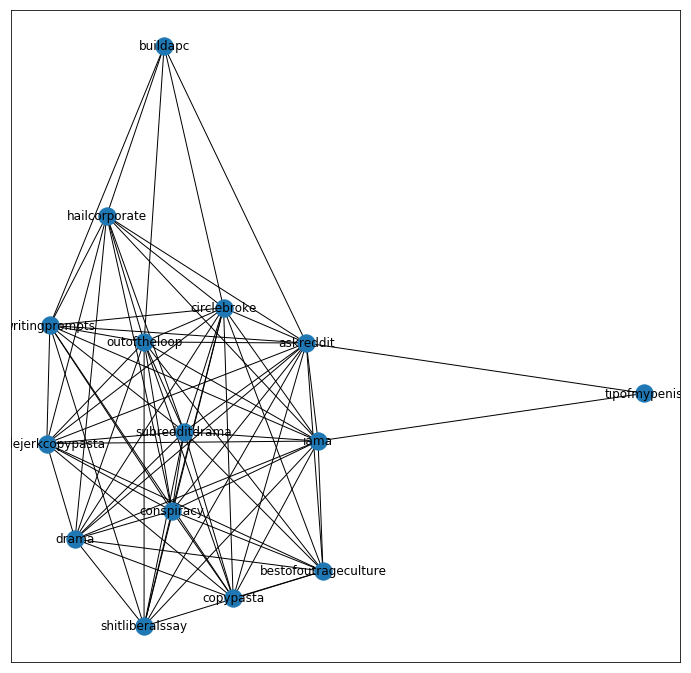

In [61]:
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx(G_filtered,arrows=True)
# nx.draw_networkx_labels(G, pos[, labels, …])



# Clustering + Adjacency Matrix Visualization

In [11]:
G=nx.from_pandas_edgelist(df, 
                          source='SOURCE_SUBREDDIT', 
                          target='TARGET_SUBREDDIT',
                          create_using=nx.DiGraph())

In [14]:
clustering_dict = nx.clustering(G)

In [16]:
clustering = sorted([(x,clustering_dict[x]) for x in clustering_dict],key=lambda t:t[1],reverse=True)


In [17]:
cluster_vals = [c[1] for c in clustering]

In [21]:
sum(cluster_vals)/len(cluster_vals)

0.1393061288361615

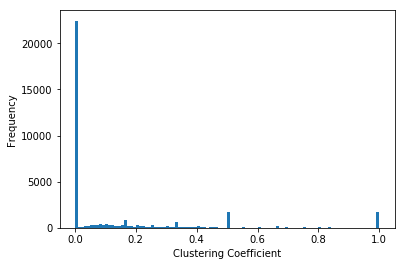

In [20]:
plt.hist(cluster_vals,bins=100)
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.savefig("clustering_coefficients.png")
plt.show()

In [22]:
cluster_cutoff = 0

In [31]:
cluster_cols = [c[0] for c in clustering if c[1] > cluster_cutoff]

In [32]:
len(cluster_cols)

13362

In [33]:
cluster_df = df[(df["SOURCE_SUBREDDIT"].isin(cluster_cols)) | (df["TARGET_SUBREDDIT"].isin(cluster_cols))]


In [35]:
cluster_df.shape

(283180, 91)

# Negative Sentiment

In [37]:
df["LINK_SENTIMENT"].describe()

count    286561.000000
mean          0.852946
std           0.522000
min          -1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: LINK_SENTIMENT, dtype: float64

In [44]:
df_neg = df[df["LINK_SENTIMENT"] < 0]
len(df_neg)

21070

In [41]:
G_neg = nx.from_pandas_edgelist(df_neg, 
                          source='SOURCE_SUBREDDIT', 
                          target='TARGET_SUBREDDIT',
                          create_using=nx.DiGraph())

In [49]:
sum([pageranks[x] for x in pageranks])/len(pageranks)

0.00015698587127159

In [56]:
pageranks = nx.pagerank(G_neg)
sorted_subreddits_by_pagerank = [x[0] for x in sorted([(k,pageranks[k]) for k in pageranks], key=lambda t: t[1], reverse=True)]
sorted_subreddits_by_pagerank

[('askreddit', 0.019529386283331028),
 ('worldnews', 0.008520134464137288),
 ('iama', 0.00752720343530011),
 ('videos', 0.0062673892792693316),
 ('news', 0.005973057321251677),
 ('todayilearned', 0.0056098537180003),
 ('funny', 0.005557476816783171),
 ('ukraine', 0.0052168760445852926),
 ('pics', 0.0049287035204954215),
 ('writingprompts', 0.004910682870233255),
 ('relationships', 0.00480788953681307),
 ('gaming', 0.004517817379117882),
 ('science', 0.004299962156098209),
 ('nfl', 0.004179735407714312),
 ('politics', 0.0040463122291227),
 ('explainlikeimfive', 0.0038993096177321967),
 ('leagueoflegends', 0.0037525560927890943),
 ('movies', 0.0032382034527301783),
 ('adviceanimals', 0.003120688008639253),
 ('the_donald', 0.003032726566628504),
 ('tifu', 0.0029645379128732793),
 ('technology', 0.0029205054358203246),
 ('wtf', 0.002742095762288389),
 ('subredditdrama', 0.002642504422816364),
 ('globaloffensive', 0.0026185710597130176),
 ('nba', 0.002569302604057829),
 ('android', 0.002540

In [50]:
clustering_dict = nx.clustering(G_neg)
clustering = sorted([(x,clustering_dict[x]) for x in clustering_dict],key=lambda t:t[1],reverse=True)
cluster_vals = [c[1] for c in clustering]
print(sum(cluster_vals)/len(cluster_vals))

0.058157251282813585


In [52]:
degree_centrality = nx.degree_centrality(G_neg)
np.mean([degree_centrality[rank] for rank in degree_centrality])

0.0007154454230694052

# Linear Regression

In [10]:
# pip install sklearn
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [11]:
df.columns

Index(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT', 'POST_ID', 'TIMESTAMP',
       'LINK_SENTIMENT', 'Number of characters without counting white space',
       'Fraction of alphabetical characters', 'Fraction of digits',
       'Fraction of uppercase characters', 'Fraction of white spaces',
       'Fraction of special characters, such as comma, exclamation mark, etc.',
       'Number of words', 'Number of unique works',
       ' Number of long words (at least 6 characters)', ' Average word length',
       ' Number of unique stopwords', ' Fraction of stopwords',
       ' Number of sentences', ' Number of long sentences (at least 10 words)',
       ' Average number of characters per sentence',
       ' Average number of words per sentence', ' Automated readability index',
       ' Positive sentiment calculated by VADER',
       ' Negative sentiment calculated by VADER',
       ' Compound sentiment calculated by VADER', ' LIWC_Funct',
       ' LIWC_Pronoun', ' LIWC_Ppron', ' LIWC_I', ' LIWC_W

In [13]:
predict_column = ["LINK_SENTIMENT"]
non_train_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT", "POST_ID", "TIMESTAMP"] + predict_column
train_columns = [col for col in df.columns if col not in non_train_columns]


In [26]:
reg = LinearRegression(normalize=True)
X = np.array(df[train_columns])
# y = np.array(df[predict_column])
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.07091516235503859
0.06329006525145547


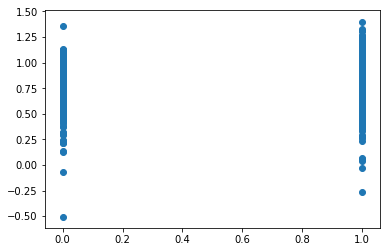

In [30]:
plt.scatter(y,ypreds)
plt.show()

In [41]:
np.dot(np.array(df[train_columns].iloc[0]), reg.coef_)

1403897311.2427979

In [53]:
# df[train_columns].columns

In [54]:
corr = df.corr()

In [54]:
# corr_dict = dict(corr["LINK_SENTIMENT"])
# sorted([(key, corr_dict[key]) for key in corr_dict], key=lambda t: abs(t[1]),reverse=True)

In [55]:
# [(df[train_columns].columns[x[0]],x[1]) for x in sorted(list(enumerate(reg.coef_)), key=lambda tup: abs(tup[1]),reverse=True)]


In [16]:
ypreds

array([1.00688529, 0.94916892, 0.92195916, ..., 0.88986015, 0.94231248,
       0.89424777])

In [17]:
df.shape

(286561, 91)

In [18]:
top_df = df[(df["SOURCE_SUBREDDIT"].isin(top_sources_names)) | (df["TARGET_SUBREDDIT"].isin(top_targets_names))]
top_df.shape

(57412, 91)

In [86]:
reg = LogisticRegression(max_iter=1000)
X = np.array(df[train_columns])
X = normalize(X)
y = np.squeeze(np.array(df[predict_column]))
y = np.where(y<0, 0,y) # change all -1s to 0s
reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
print(reg.score(X,y))
ypreds = reg.predict(X)
print(mse(y,ypreds))

0.9264728975680571
0.07352710243194294


In [21]:
top_reg = LogisticRegression(max_iter=1000)
top_X = np.array(top_df[train_columns])
top_X = normalize(top_X)
top_y = np.squeeze(np.array(top_df[predict_column]))
top_y = np.where(top_y<0, 0,top_y) # change all -1s to 0s
top_reg.fit(top_X,top_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
print(top_reg.score(top_X,top_y))
top_ypreds = top_reg.predict(top_X)
print(mse(top_y,top_ypreds))

0.856754685431617
0.1432453145683829


In [23]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)

In [24]:
top_reg = LogisticRegression(max_iter=100)
top_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
print("Train error", top_reg.score(X_train, y_train)) # comparing results from filtered df with(out) train/test
print("Test error", top_reg.score(X_test, y_test)) # comparing results from filtered df with(out) train/test
test_ypreds = top_reg.predict(X_test)
print(mse(y_test,test_ypreds))

Train error 0.8570350299980647
Test error 0.85423197492163
0.14576802507836992


In [24]:
tree = DecisionTreeClassifier()
X = np.array(df[train_columns])
y = np.squeeze(np.array(df[predict_column]))
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
print(tree.score(X,y))
ypreds = tree.predict(X)
print(mse(y,ypreds))

0.9970582179710428
0.01176712811582874


In [66]:
top_tree = DecisionTreeClassifier()
top_X = np.array(top_df[train_columns])
top_y = np.squeeze(np.array(top_df[predict_column]))

In [67]:
top_tree.fit(top_X,top_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
print(top_tree.score(top_X,top_y))
top_ypreds = top_tree.predict(top_X)
print(mse(top_y,top_ypreds))

0.9965512436424441
0.013795025430223647


In [70]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)

In [79]:
top_tree = DecisionTreeClassifier(#min_samples_split=100,random_state=10)
top_tree.fit(X_train,y_train) # trying now with training/testing sets

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
print(top_tree.score(X_test,y_test))
test_ypreds = top_tree.predict(X_test)
print(mse(y_test,test_ypreds))

0.7908394287704632
0.836642284918147


In [35]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(top_X,top_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
print(KNN_model.score(top_X,top_y))
knn_ypreds = KNN_model.predict(top_X)
print(mse(top_y,knn_ypreds))

0.8738242876053787
0.5047028495784853


In [ ]:
# attempt at one_hot section with filtered df for top source and/or target subreddits

In [37]:
one_hot_columns = ["SOURCE_SUBREDDIT", "TARGET_SUBREDDIT"]

In [44]:
source_enc = OneHotEncoder()
top_source = source_enc.fit_transform(np.array(top_df["SOURCE_SUBREDDIT"]).reshape(-1,1)).toarray()
top_sourceOneHot = pd.DataFrame(top_source, 
                            columns = ["SOURCE_SUBREDDIT_"+str(i) for i in range(top_source.shape[1])]
                           )

target_enc = OneHotEncoder()
top_target = target_enc.fit_transform(np.array(top_df["TARGET_SUBREDDIT"]).reshape(-1,1)).toarray()
top_targetOneHot = pd.DataFrame(top_target, 
                            columns = ["TARGET_SUBREDDIT"+str(i) for i in range(top_target.shape[1])]
                           )
print(top_source)
print(top_target)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
d3 = top_target.shape[1] + top_source.shape[1] + top_df.shape[1]
top_bigDf = np.empty((top_target.shape[0], d3))

In [47]:
top_target.shape

(57412, 3451)

In [48]:
# np.concatenate([df, source, target], axis=1)
top_target_shape = top_target.shape
top_source_shape = top_source.shape

top_bigDf[:,:top_target_shape[1]] = top_target
del top_target
top_bigDf[:,top_target_shape[1]:top_target_shape[1]+top_source_shape[1]] = top_source
del top_source
top_bigDf[:,top_target_shape[1]+top_source_shape[1]:] = top_df


ValueError: could not convert string to float: '2017-04-30 16:41:53'

In [49]:
source_enc = OneHotEncoder()
source = source_enc.fit_transform(np.array(df["SOURCE_SUBREDDIT"]).reshape(-1,1)).toarray()
sourceOneHot = pd.DataFrame(source, 
                            columns = ["SOURCE_SUBREDDIT_"+str(i) for i in range(source.shape[1])]
                           )

target_enc = OneHotEncoder()
target = target_enc.fit_transform(np.array(df["TARGET_SUBREDDIT"]).reshape(-1,1)).toarray()
targetOneHot = pd.DataFrame(target, 
                            columns = ["TARGET_SUBREDDIT"+str(i) for i in range(target.shape[1])]
                           )

In [ ]:
d2 = target.shape[1]+source.shape[1]+df.shape[1]
bigDf = np.empty((target.shape[0], d2))

In [48]:
target

NameError: name 'target' is not defined

In [ ]:
# np.concatenate([df, source, target], axis=1)
target_shape = target.shape
source_shape = source.shape

bigDf[:,:target_shape[1]] = target
del target
bigDf[:,target_shape[1]:target_shape[1]+source_shape[1]] = source
del source
bigDf[:,target_shape[1]+source_shape[1]:] = df


In [41]:
target.shape

(286561, 20606)

In [20]:
df_columns = df.columns

In [25]:
dfNp = df.to_numpy(copy=True)

In [23]:
source.shape

(286561, 27863)

In [22]:
dfNp.shape

(286561, 91)

In [ ]:
df

In [ ]:
df = pd.concat([df, sourceOneHot], axis=1)

In [ ]:
df.head()

# Keras

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

model = Sequential()

In [85]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [71]:
df[train_columns].head()

,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,"Fraction of special characters, such as comma, exclamation mark, etc.",Number of words,Number of unique works,Number of long words (at least 6 characters),Average word length,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,345.0,298.0,0.756522,0.017391,0.086957,0.150725,0.075362,57.0,53.0,10.0,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,101.0,98.0,0.742574,0.019802,0.049505,0.059406,0.178218,14.0,14.0,2.0,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,85.0,85.0,0.752941,0.023529,0.082353,0.011765,0.211765,10.0,10.0,2.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,1124.0,949.0,0.772242,0.001779,0.057829,0.179715,0.046263,191.0,125.0,34.0,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,715.0,622.0,0.777622,0.006993,0.025175,0.145455,0.069930,119.0,92.0,22.0,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [78]:
model.add(BatchNormalization())
model.add(Dense(units=1, activation='relu', input_dim=86))


In [79]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(top_X, top_y, test_size=0.1)
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 3s 63us/step - loss: 0.1231 - acc: 0.8567
Epoch 2/10
51670/51670 [==============================] - 3s 67us/step - loss: 0.1233 - acc: 0.8566
Epoch 3/10
51670/51670 [==============================] - 3s 66us/step - loss: 0.1235 - acc: 0.8565
Epoch 4/10
51670/51670 [==============================] - 4s 69us/step - loss: 0.1235 - acc: 0.8565
Epoch 5/10
51670/51670 [==============================] - 4s 74us/step - loss: 0.1231 - acc: 0.8568
Epoch 6/10
51670/51670 [==============================] - 4s 73us/step - loss: 0.1231 - acc: 0.8568
Epoch 7/10
51670/51670 [==============================] - 4s 74us/step - loss: 0.1236 - acc: 0.8564
Epoch 8/10
51670/51670 [==============================] - 4s 73us/step - loss: 0.1231 - acc: 0.8566
Epoch 9/10
51670/51670 [==============================] - 4s 77us/step - loss: 0.1232 - acc: 0.8566
Epoch 10/10
51670/51670 [==============================] - 4s 78us/step - loss: 0.1231 - acc: 0.8568

In [91]:
deep_model = Sequential()
model.add(BatchNormalization())
model.add(Dense(units=64, activation='linear', input_dim=86))
model.add(Dense(units=64, activation='linear', input_dim=64))
model.add(Dense(units=1, activation='linear', input_dim=64))
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51670/51670 [==============================] - 8s 147us/step - loss: 0.1248 - acc: 0.8530
Epoch 2/10
51670/51670 [==============================] - 6s 120us/step - loss: 0.1218 - acc: 0.8570
Epoch 3/10
51670/51670 [==============================] - 6s 120us/step - loss: 0.1219 - acc: 0.8570
Epoch 4/10
51670/51670 [==============================] - 6s 119us/step - loss: 0.1217 - acc: 0.8570
Epoch 5/10
51670/51670 [==============================] - 6s 122us/step - loss: 0.1217 - acc: 0.8570
Epoch 6/10
51670/51670 [==============================] - 6s 126us/step - loss: 0.1217 - acc: 0.8570
Epoch 7/10
51670/51670 [==============================] - 7s 131us/step - loss: 0.1216 - acc: 0.8570
Epoch 8/10
51670/51670 [==============================] - 7s 136us/step - loss: 0.1216 - acc: 0.8570
Epoch 9/10
51670/51670 [==============================] - 7s 135us/step - loss: 0.1216 - acc: 0.8570
Epoch 10/10
51670/51670 [==============================] - 7s 136us/step - loss: 0.1215 - a

# Post Lookup

In [17]:
import requests
import praw
import time

In [100]:
payload = {'id': 't3_1u4nrps'}
url = "https://oauth.reddit.com/api/info"
r = requests.get(url, params=payload)

In [99]:
r

<Response [403]>

In [121]:
df.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,Number of characters without counting white space,Fraction of alphabetical characters,Fraction of digits,Fraction of uppercase characters,Fraction of white spaces,...,LIWC_Leisure,LIWC_Home,LIWC_Money,LIWC_Relig,LIWC_Death,LIWC_Assent,LIWC_Dissent,LIWC_Nonflu,LIWC_Filler,
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,345.0,298.0,0.756522,0.017391,0.086957,...,0.068966,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,101.0,98.0,0.742574,0.019802,0.049505,...,0.000000,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,85.0,85.0,0.752941,0.023529,0.082353,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,1124.0,949.0,0.772242,0.001779,0.057829,...,0.031250,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.020833,0.005208
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,715.0,622.0,0.777622,0.006993,0.025175,...,0.016667,0.025000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333


In [15]:
app_id = "WNPRavmctL1k7A"
secret = "5i7KCyyzmGprUMxWf7Z_HVoncyI"
agent = "pc:com.example.myredditapp:v6.5.1 (by /u/punsandunicorns)"
username = "punsandunicorns"
password = "Zh@ngzh123"

In [18]:
reddit = praw.Reddit(client_id=app_id,
                     client_secret=secret,
                     user_agent=agent,
                     username=username,
                     password=password)

In [110]:
submission = reddit.submission(id='39zje0')
print(submission.title)

reddit will soon only be available over HTTPS


In [21]:
lines_written = sum(1 for line in open('subscribers.txt'))
print(lines_written)
sorted_subreddits_by_pagerank[lines_written-1:][:10]

53


['minecraft',
 'videos_discussion',
 'techsupport',
 'confirmedtestcss',
 'buildapc',
 'relationships',
 'sandersforpresident',
 'nfl',
 'ideasfortheadmins',
 'the_donald']

In [22]:
with open("subscribers.txt","a+") as fp:
    for subreddit in sorted_subreddits_by_pagerank[lines_written:]:
        iters_remaining = 2
        timeouts = [60, 5]
#         while iters_remaining > 0:
        try:
            sub = reddit.subreddit(subreddit)
            print(subreddit, sub.subscribers)
            fp.write(subreddit+","+str(sub.subscribers)+"\n")
            iters_remaining = 0
        except:
#                 iters_remaining -= 1
            print("failed",subreddit)
#                 print("waiting...")
#                 time.sleep(timeouts[iters_remaining])
#                 print("continuing")
            fp.write(subreddit+",-1\n")
            print(subreddit,-1)

                


failed videos_discussion
videos_discussion -1
techsupport 862853
confirmedtestcss 12
buildapc 2149913
relationships 2842758
sandersforpresident 505283
nfl 1894298
ideasfortheadmins 20260
failed the_donald
the_donald -1
legaladvice 1208816
personalfinance 14154684
offmychest 1927228
cfb 806229
fitness 7721830
horror 1534908
quityourbullshit 1382357
syriancivilwar 93397
bestof 5269724
collegebasketball 1203836
destinythegame 1435349
bestof2014 213
pokemongo 2400791
steam 811083
mildlyinteresting 17358438
casualiama 201787
overwatch 2870079
pokemon 2385996
fox 2976
futurology 14550007
tipofmytongue 1161039
nba 3213716
diy 17282593
ps4 3121112
aww 24423772
mhocpress 771
oculus 233538
sysadmin 452718
trees 1534415
history 14725094
india 320967
magictcg 390744
civcraft 8181
jokes 18230330
baseball 1179032
programming 2559246
kotakuinaction 118925
sex 1535543
twoxchromosomes 12695038
self 902062
changemyview 993749
whowouldwin 297142
dnd 1695182
wow 1476750
redditrequest 142080
television 164

mac 1609430
whatcarshouldibuy 62216
suggestalaptop 78877
failed modelmidwesternstate
modelmidwesternstate -1
cringepics 1212899
cryptocurrency 1000434
marvel 668135
codcompetitive 100560
dndbehindthescreen 297611
roosterteeth 248934
gardening 2515778
badeconomics 52046
copypasta 627510
cynicalbrit 56410
washingtondc 97096
learnpython 341545
prorevenge 960232
worldpowers 6409
bodyweightfitness 1423751
audioengineering 178908
lightbulb 76428
collapse 187005
tinder 3451029
androidgaming 192986
footballhighlights 170306
sexsells 222627
military 246093
grandtheftautov_pc 55844
cooking 1736192
stopdrinking 226695
manga 1123718
failed smutbuddy
smutbuddy -1
iwantout 674072
survivor 112916
monstercat 54353
datasets 108927
ironthronerp 3024
ncaaw 2212
nascar 410746
nonfictionbookclub 6377
femalefashionadvice 1242001
modernmagic 76137
novapbs 269
genetics 52194
askculinary 294492
firefox 105561
giftofgames 98447
iwanttolearn 607083
weddingplanning 126877
foodporn 2869213
dragonage 123777
dallas 

letsplay 71212
repsneakers 213010
newjersey 98595
gamecollecting 131243
bostonceltics 206030
croatia 66359
bravefrontier 45867
aviation 586797
chillingeffects 2192
kitchenconfidential 255802
chiliadmystery 30848
touhou 54137
contestofchampions 47527
college 290606
cbrbattleroyale 195
asianamerican 36696
buffalobills 62807
homenetworking 117989
bladeandsoul 42874
failed watchpeopledie
watchpeopledie -1
fantasypl 200269
montreal 88923
steelers 114340
fantasybaseball 114598
mltp 1122
bapcsalescanada 63651
suomi 126353
gundeals 240284
geek 585194
guitarpedals 114582
productivity 417469
failed whiskyinventory
whiskyinventory -1
bmw 141295
subredditoftheday 806515
feminism 171627
progresspics 1067821
quotes 267330
chelseafc 172964
seattlewa 120453
h3h3productions 461375
sandiego 100235
posthardcore 66779
mandelaeffect 170940
rational 17487
beards 198623
california 123851
scotch 114448
jihadinfocus 2656
pakistan 49431
sorceryofthespectacle 19589
wayofthebern 77689
hillaryclinton 33112
unsentl

everymanshouldknow 398043
gwaprofiles 1454
iamverysmart 1311464
unsolvedmysteries 218628
stims 64500
animalsbeingbros 3121945
dadjokes 2526480
asktrumpsupporters 76469
modelushouseestcom 55
modelushouseelecom 55
themindilluminated 19293
simracing 111040
lostgeneration 124729
modelaustralia 160
malaysia 75978
modelsenatejudicicom 35
modelsenatefacom 28
fishing 567055
badbios 1863
windows8 10451
coachella 65343
columbus 54990
soylent 35823
wec 45267
realestate 181888
kodi 88035
badlinguistics 50122
indiemakeupandmore 81601
thesims 286393
foodforthought 327349
rimworld 221524
drunk 286873
askeurope 102629
usefulscripts 27731
advancedmicrodevices 4717
stellaris 209275
confessions 681198
talesfromyourserver 338715
fetishverified 10857
redditraiderscoc 149
redditozone 82
topofreddit 24837
asktechnology 19548
motorsports 23677
trueaskreddit 223039
weirdboobs 24187
kindalookslike 44801
chromeos 99674
seventhworldproblems 53635
gametales 43043
daystrominstitute 63674
politic 44208
assettocorsa 

oklahoma 33078
ptsd 42978
trance 64692
osvr 2563
bipolar 102306
borderlands 295722
selfpublish 43641
wardrobepurge 22748
translation 6510
navy 85476
failed pobiotic
pobiotic -1
nintendonx 12394
bpd 87946
statistics 100760
dwarvendistrict 383
custommagic 29249
requestabot 3735
frisson 194621
truedetective 89546
indiana 30864
scenesfromahat 77473
leoduhvinci 10028
makingamurderer 74577
ads 10632
invenglobal 47
natureismetal 1462711
demohoi4 187
pokemoninsurgence 15330
conspiratard 64935
metalfoundry 4995
ask_politics 47473
srssucks 15482
watchexchange 105946
fullmoviesonyoutube 264870
failed agmarketplace
agmarketplace -1
futurebeats 105064
esperanto 17390
utahjazz 79095
punk 109655
leagueofireland 2831
synology 45000
learnart 236401
futurefight 7605
nova 55782
colorado 106229
shouldibuythisgame 831435
n64 94780
allgamers 51
att 21426
datascience 215749
orlandomagic 69149
plumbing 50666
bigseo 55155
ark 138831
playstation 266768
standup 80090
identitymmo 1607
warriors 264675
mlquestions 

femradebates 9184
nhlhut 37050
buildmeapc 56396
yuyuhakusho 12511
exnocontact 57498
education 104265
sino 38900
narutobattlegrounds 215
naruto_oc 87
himym 154786
slctrees 2485
gta 96302
ula 7083
ps2cobalt 2428
slashdiablo 11914
fragsplits 10543
amisexy 44688
panamapapers 44000
animalsbeingjerks 3022506
honda 80557
askhr 35099
advancedproduction 24601
delusionalartists 497132
animewallpaper 127740
freebits 3320
csgolounge 9950
deathgrips 99633
miband 31117
brakebills 39433
churchofrobin 8
turtlegame 33
brogress 150476
northkorea 18454
wallpaper 1224360
nosleepooc 56424
lifeisstrange 77402
rhockeymockdraft 66
supportlol 45194
badscience 23321
oceanictagpro 360
aliens 157143
simplerockets 4987
coins 54871
failed audiosexual
audiosexual -1
necrodancer 8488
ukpersonalfinance 97505
hiphop101 34958
androidtv 57047
danzilona 147
samharris 55890
circlejerkcopypasta 9981
emeraldps2 3710
androidpreviews 12828
retrofuturism 398224
casualpokemontrades 36029
latterdaysaints 33750
cosmos 18989
soulsr

dvdcollection 50952
nms_zoology 1895
tampa 49777
adultery 69392
indianahoosiers 4214
fiftyfifty 1490261
socialismvscapitalism 73
online2k14 19
characterforge 8253
oney 33379
gundam 73712
randomactsofmuffdive 182151
redditnu 73
skyrimrequiem 18920
2k14oa 66
sonicthehedgehog 69844
xxxcaptions 110950
fighters 44232
thalassophobia 638343
eesti 28208
plantedtank 135545
asksf 24249
introvert 199793
spiderman 184247
greentext 1004584
diablo3monks 13384
bittippers 2023
academia 13884
stopsmoking 104724
promptoftheday 11435
etsy 78805
telegram 56632
diypedals 33040
iracing 51608
happy 403802
3dsdeals 29412
node 157899
digimon 55479
zangames 241
neckbeardstories 56325
sips 55641
bass 132655
serversmash 389
customhearthstone 84371
nissan 26800
kde 46308
movieposterporn 164296
steamteamred 851
nflroundtable 5863
nvidiahelp 859
specart 862715
evilleagueofevil 19642
elysiumproject 12907
gamingpc 145160
learnjavascript 107258
classtv 878
starwarsrp 800
deepspacenine 16367
polska 139632
nexusplayer 23

overlanding 83201
hscoaching 1054
lawncare 56658
yawriters 10042
fencing 20866
techsupportmacgyver 237363
bf_hardline 8564
wicca 76899
accursedkings 306
digitalnomad 717890
battlefront 29624
norse 50537
lookingforgroup 2414
rpgstuck 1504
the_gaben 15035
justunsubbed 93850
porsche 85698
azirmains 12200
writerchat 2976
serialpodcastorigins 8890
leaves 125435
edcexchange 14471
truebigdickstories 20478
dota2castit 920
maledomempire 30186
failed teedubsbooty
teedubsbooty -1
failed scrandle
scrandle -1
halloween 130761
plazaandalucia 173
thelastpsychiatrist 3519
realbne 248
ucsantabarbara 16907
bloomington 11528
skincareexchange 16060
fnafcringe 43991
theghbdproject 63
thesecretworld 7017
slatestarcodex 26681
smitetrades 3542
gay 174871
halostory 28990
adtr 5509
phoneverification 6661
twinks 122109
dawngate 5368
askanthropology 80112
waxpen 52459
nfladventureclub 202
stupidslutsclub 233246
welcometohell 9073
redditnotes 2630
nitrogensports 882
egypt 37815
targetedenergyweapons 2506
umcu 1153

meirl 1029581
teaching 60125
echerdex 11610
cubs 21442
deadmau5 35416
mturk 67186
skinwalkers 51372
microphones 3381
iosthemes 78191
designmyroom 63638
logh 3693
mommit 103367
scifiwriting 26251
lovecraft 152745
academicpsychology 45491
anonymous123421 266
coldwarpowers 986
bioshock 95018
spacexmasterrace 25410
prince 8067
theredguard 1218
twentyonepilots 102800
vaping101 38001
trollxmovienight 1337
projectara 2662
jeopardy 49947
amifreetogo 34894
findaunit 9248
askastronomy 25855
angelsbaseball 16814
iceland 41839
designporn 926921
videoediting 96435
cloud9 40667
firefighting 46968
awesome 166100
playleet 33
tabletennis 24403
aquamarinesbarracks 65
marvelunlimited 8779
mtgjudge 5815
relayforreddit 100670
colorizedhistory 562449
behindtheaudiophile 318
fidelitypdx 27
opiatesrecovery 24566
dragonrejects 60
sandbox 264
canadaguns 27461
starblecch 1597
heroesofnewerth 11659
metalgearphilanthropy 1894
reddituserleague 65
cockatrice 4959
woweconomy 93538
coloradosprings 26188
socialcitizens

allcoolentertainment 2
watchosbeta 6905
redditfoxtrotbb 51
buildingyourupinion 12
japaneseunderground 3010
everquest 14223
aquadragon 252
kotor 65009
chanzhfsneakers 30530
knives 204743
enterthegungeon 105962
stalker 47804
breakups 118330
mtaugustajustice 206
tf2asia 111
monalisaclan 668
gentlemanboners 559795
tempeventcommitteelom 13
southshire 268
denton 14744
tweakbounty 10853
castiron 166899
shittygifrecipes 40991
sikh 9950
csgoscammers 516
windowsinsiders 8866
quidditch_world_cup 176
newtothenavy 29691
corejerk 3990
forensics 17763
airsoftmarket 37076
zenhabits 188055
antidepressants 12001
minecraftmod 2832
melodicdeathmetal 19145
redditdotcom 4941
virginmobile 580
liberal 86086
traaaaaaannnnnnnnnns 158501
curlyhair 359281
dorgan 10
wallpaperrequests 8394
steamgiveaway 5793
katarinamains 22025
taylorswift 89957
americanhorrorstory 144514
ktane 2490
tmbr 16222
starwarseu 49739
ecr_uk 5950
placestart 1646
aurelion_sol_mains 8365
necropolis 1129
failed karakuratown
karakuratown -1
fa

applebandmarket 3872
formcheck 10830
smarthome 62062
spnati 16631
failed dvz
dvz -1
maui 9121
teaexchange 3742
paintball 34995
injustice 39393
salvia 17072
godaddy 418
modelaustraliahr 28
microbiome 13873
symmetramains 6609
behindthetables 22958
gotrades 7244
homedefense 45308
ynab 94406
irc 8227
nonmonogamy 61390
gaygiles 2387
closetsanta 390
failed brightonvapeclub
brightonvapeclub -1
communalists 7951
referencethreads 13
product_design 26178
beatmatch 60860
fifacareers 83705
failed scryptminingrigs
scryptminingrigs -1
weezer 34611
gameshow 3238
failed lasnoches
lasnoches -1
bmoremoto 450
gtagivers 13311
stormcoming 10634
brse 387
littlespace 52478
waterporn 86865
bostonindie 65
atheismplus 4671
atahop 16
mtgfrontier 4454
bootcamp 3532
minecraftclues 163
maddenultimateteam 68410
frc 32921
blackfellas 36909
cuddle_with_me 334
festivalplaza 2545
simcity4 7287
allthingsprotoss 20855
asheville 22237
avfc 7409
dynamo 5349
theamazingbulk 164
0magick 60
mtgcube 15021
bustypetite 1109750
fir

fffffffuuuuuuuuuuuu 871166
d3hardcore 2819
massivecock 263560
dereksmart 1344
gwcouples 618969
mmj 31043
darksoulsrp 174
telemmo 51
computerscience 133529
failed seireitei
seireitei -1
yokaiwatch 10439
failed mavgdesigners
mavgdesigners -1
trgmusicians 29
flashgames 6797
mindundercontrol 411
modelsupremecourt 13
ranmelectionverify 2
modelrussiagov 56
modelebay 6
colonialmhoc 14
robinhobb 7960
bakker 1273
powdermage 1805
robinhood 259328
thepopcornstand 7048
sherlock 117434
chibike 5355
netherward 200
imaginaryfallout 23973
censorship 7502
machineporn 725231
mtgaltered 24266
brandnew 28582
transcribe 7283
rocketbeans 47184
acadiana 7171
intrusivethoughts 79086
thisismylifenow 796481
belarus 3403
worldprompts 5740
2b2t 108837
katowicetrading 2580
orthodoxchristianity 17469
farcry4 5198
stem 4744
comicwriting 7142
waterloo 15799
bitcoin_exposed 354
sissies 167004
stanleykubrick 24430
demonssouls 29383
makemeagif 3805
mflbguide 1307
tagpromapsharing 110
whitewolfrpg 21171
robocraft 8883
no

insurgencebattles 140
monstermusume 48911
helldivers 8306
spongebros 14763
mw2 10182
thewaywewere 405925
santacruz 12334
gametheory 12064
aotrp 251
rochester 23438
registertovote 14
houstonclassifieds 5761
quitdebt 156
placenl 361
onebros 5769
bifweightloss 80
ivernmains 7836
day9 9335
hearthdecklists 9039
5cardhearthstone 177
referralsforpay 827
blazblue 16559
thearbitrarygamejam 47
chriscftb97 25
wpdev 2893
harambe 20063
comphsdeleted 133
comiccodes 2838
nextcloud 10715
terrainbuilding 62823
albany 13463
thevinylexchange 578
fo4mods 5765
makeupaddicts 30598
askdoctors 4693
visitingiceland 19464
ull 767
aram 4946
phillies 38165
panties4sale 19039
entp 30327
failed itsallmarconow
itsallmarconow -1
fargotv 36386
ayymd 118339
sabermetrics 6831
shadowofmordor 38221
gunpolitics 72603
civagora 168
underminers 5554
googlemaps 26797
csstutorials 1978
thefence 18701
survivorrankdown 143
megaten 47968
plantsvszombies 21888
dreadfort 17583
hatfilms 28020
usf 8440
macroporn 121755
nagios 1952
chr

smashart 3221
stylus 2138
civcraftfellowship 171
czfirearms 16036
kustom 32736
shortsweetstories 23
harvestmoon 23563
holmes 4839
cuckoldcommunity 41329
animechurch 137
theoriginals 9626
cryptography 33316
heirs_of_the_sun 612
vgstreams 5380
mobpsycho100 48695
thecube 2591
esops4 2580
saskatoon 19145
canadianvanguard 13
beardeddragons 52942
smartphones 11320
thedailydecrypt 230
payday2secret 4338
ween 17659
trendingnsfw 21236
failed researchvendors
researchvendors -1
wishlist 44491
portfolios 14485
kicksmarket 13532
mortgages 17661
rugbystreams 15299
portal2 2758
strugglefucking 249222
toomeirlformeirl 300736
bookcollecting 8536
battlenetwork 10076
memacs 12
rolltide 18274
duellinks 95960
deskbots 901
graphicscard 5702
vacsucks 14570
worldchallenges 897
russian 84677
team_liquid 4089
unbelievableevents 98
avengedsevenfold 23646
beetle 7662
godzilla 88046
failed darkmarketsbrasil
darkmarketsbrasil -1
aurora 5516
holodeck 520
cod4 1012
bgmll 174
bokunoheroacademia 445035
firefall 3522
mc

femdomcommunity 32789
lineage2revolution 11647
pathfinder_acg 2681
baragoon 12
lroleplay 91
sweetfx 881
failed drugstashes
drugstashes -1
officialsodapoppin 3880
savageshooters 964
rantgrumps 15665
hotlinemiamimods 252
redditinfinity 145
ironmaiden 18600
tensorflow 16779
castinueva 157
pennyforyourtautbod 34
failed callmev
callmev -1
gunsarecool 29082
ejuicereviews 229
occupywallstreet 35223
cryptoubi 1463
americanpegasus 137
justridingalong 12486
irishproblems 11948
bundesliga 289567
bf4_eu 171
karmaconspiracy 133019
followersoftheshade 1059
quraniyoon 1313
rd2lbans 15
listentothat 1327
littleknownmusic 605
breakcore 6071
thesoutherntimes 9
billyplz 5
parentlessbychoice 2564
lettering 28490
osxtweaks 6774
vitapiracy 38636
shittysmashgifs 238
tr4shbros 163
hitsworthturkingfor 76657
onewordeach 62606
godfound 3
animemes 820267
spanishfootball 1292
zweiteliga 986
cocflamfans 4
abandonware 5619
mlbstreams 221920
questionablecontent 10941
auslaw 18980
podcasting 41085
disco 8258
animedeals

failed herobuilds
herobuilds -1
dotavods 14148
funkark 164
20psi 92
brstm 588
ragenchastain 6404
hackernews 42555
reversegif 58919
indianents 17032
mcpublic_fipa 13
brom 83
metalmountains 25
mcpico 118
pveawards 26
istp 12272
unpopularopinion 1175857
tacoma 14739
narffl 4598
nsfw411 443645
edinburgh 29877
dotnet 74265
blacklight 2912
zeldaconspiracies 8937
johnnys 508
manabase 6
elvesmtg 2391
aquascape 35134
deepfreeze 655
failed ggic
ggic -1
oilandgas 3373
deepwebpics 15016
bitcoinuk 10120
greenmangaming 2136
redditjrs 36
webvr 11782
bigboobproblems 81872
professors 49905
arkmayhem 23
arkbuyandsell 5713
badpolitics 14718
gnu 12597
smitevod 47
ibm 6575
lacrosse 25398
hopheadsde 478
btcfork 2997
aspergirls 27014
332e313431353932 64
austinjobs 9434
fortiris 60
tabletopsimulator 26955
23andme 46746
corgi 431274
gnostic 6323
doodlesofwesteros 62
writingprompt 7127
failed atv4
atv4 -1
realsocialengineering 8967
cherokeexj 14602
lomsanddunes 133
watersports 66251
kronoswow 11405
mindcrackcir

reformedfightclub 589
frugalnyc 3226
sterilization 2697
elitetorval 481
grandcherokee 9266
eu 3393
commercialav 6977
jazzguitar 24989
koinme 328
texasbeer 3496
redditalternatives 16193
windowsserver 5883
failed stormlightreadalong
stormlightreadalong -1
nycapartments 17489
findfashion 78989
thefinalclean 1307
freeplayers 376
fazcourt 61
mobileweb 2039
readmyscript 12924
writersof500words 1270
infinitythegame 7657
shadowverse 35086
succubae 1933
spectrex360 3031
dmscape 2
longboardbuilding 3540
longboardingcsstest 31
suzukisamurai 1926
codclanhq 1531
lissandramains 3595
baldursgate 29887
failed girlsdoporn
girlsdoporn -1
2pm 273
ikon 2361
thearkpop 154
big_brain 50
cubepentagon 662
failed bestkpop
bestkpop -1
uwave 33
jombly 84
koreanmusic 5137
60fpskpop 319
browneyedgirls 363
broduce101 4386
doitamazing 468
dalshabutt 14
clayton_kershaw 98
failed paperjam
paperjam -1
tallfashionadvice 9830
thestrokes 40347
creampie 197045
audiorepair 4647
guam 3092
heroesandgenerals 10284
sufjanstevens

minionhate 49186
nadamobileapp 380
giftutorials 1605
warcollege 23768
ukinvesting 13229
macos 78911
beijing 7637
enlightenedbirdmen 66641
wrestlewiththeplot 114263
microcontrollers 6423
roasting 24884
fightingsioux 167
crossword 5199
mentors 6103
lifeasannpc 37535
railgun 2779
mcclanemacleod 7
carplay 11840
runningman 28186
tumblratrest 31849
tabletopcrusaders 1051
ragecenter 323
thebuttondeathclock 10
dancedancerevolution 7780
thebuttonandroid 6
bannination 129
chaoslegion 45
themiddleway 65
truethebutton 55
failed yestap
yestap -1
regina 9008
jontron_h 13
randomsuperstories 5
treebusiness 3535
xboxonehelp 2874
failed quantikxanax
quantikxanax -1
portal_ja 312
climatestabilization 387
failed r_sandbox_r
r_sandbox_r -1
antinatalism 60941
dxm 27436
prettylittleliars 28651
theabscondbundle 2868
capowersmeta 2
zombieapocalypse 312
giefopensource 4
mmprestiges 51
tytonreddit 3851
dbbteam 29
dailymafia 411
hot100 8590
failed truzx
truzx -1
kfschnee 44
souleater 10375
gmatresources 1585
disc

garo 735
ffxivglamours 34640
whatsthisrock 62722
sociopath 33622
sportingkc 6515
cumfromanal 106278
podiatry 1936
modestmarill 1
hiphop 61134
ejuice_reviews 3716
crashplan 747
parkwaydrive 1634
cemugraphicpacks 675
heroesneverdie 24
ploungeafterdark 11994
failed controversialrehost
controversialrehost -1
bushcraft 145932
funnystories 6374
miscarriage 6294
textyourex 528
amiwrong 10660
fear 477
relationship_thoughts 590
puertorico 19944
theredditrebels 582
failed internetimprov
internetimprov -1
redditimprov 1016
cruxcup 30
cpma 312
ashen_assembly 48
vagabond 591890
winkhub 5393
dnm_memes 3136
hydraulicpresschannel 12723
failed dream_market
dream_market -1
squirrels 15903
agoraphobia 8147
helpmecope 7645
deathstranding 136798
starboundservers 756
starboundmods 1365
starboundbugreport 164
ecology 38410
bf4_x1 1036
reddx 18204
redditcensorship 2777
lushcosmetics 55901
anglish 5581
nofiller 1324
todayilearnedthat 70
mfdoom 23980
leakthreads 25878
findmusic 134
aussiehiphop 3224
bayrap 3138

service_dogs 10862
taekwondo 13331
stockaday 3336
pestcontrol 5196
enoughantifaspam 936
failed sister_hannah
sister_hannah -1
facebankforbernie 38
longevity 51226
blackmirror 321687
reincarnation 13441
sketches 53927
redditclanshistory 33
xboxonegamers 19566
nomareservations 496
warcraftlfg 57
wowstreams 694
thefailtraineu 46
flagnorfailguild 3
wowmacros 471
heraldofthetitans 20
ecto 58
brokengifs 100932
mechanical_gifs 634724
edensb 4
pokemonxtremeoverride 51
europes 5199
magiccardpulls 3657
playmagic 1069
failed battalionassignment
battalionassignment -1
britguard 59
unityassets 6714
writersgroup 20793
bellingham 15158
wordpress_themes 6751
wordpressthemes 5663
games_journalism 2445
danganroleplay 1821
baltimoreanddcr4r 15977
roleplayadventure 777
theoverbork 72
qzrestaurant 114
ihearyou 149
ballet 15982
yaynay 3
someredditstats 31
9m9h9e9 14944
bedbugassistance 484
origintp 186
highstrangeness 133986
lineageos 55647
averagejoeaudiophile 2245
savebrendan 42612
debatinghockey 108
shin

bankingclanmemes 6956
kimchitheory 81
dcfu 3800
failed makeupfakes
makeupfakes -1
portlandmakeup 44
olivemua 13357
blur 4457
completeanarchy 117374
debt 7501
writerschoice 1323
ludobots 1128
reckful 37497
zeldabotw 11474
proaudio 932
atldiscgolf 193
buildapchelp 420
onetrueklein 1375
cavestory 4687
stpetersburgfl 14576
wwiipics 106199
thebuttongrove 145
swirclejerk 1255
capitalism 25204
starwarsarmada 9340
clueboard 441
falloutequestria 3318
fuee 811
medicinelibrary 149
failed jakielim
jakielim -1
warelephant 38
sunofausterlitz 36
wombokongo 3
siouxallthenations 5
failed civbrfiction
civbrfiction -1
therainsofcasimir 34
shivermetimurids 9
brn 41
purplephoenix 28
greatleapsforward 28
mansamucho 5
arrlmao 329
godsavethebants 53
removecanifestdestiny 66
wildcats 5257
reddit_space_program 707
consoleksp 2760
kspmoddevelopment 319
kspmemes 9030
fortheloveofgaming 544
realsolarsystem 3434
herbalspaceprogram 1249
thedailyorbit 116
aufc 7
comlocke 7
communitylocke2017 12
mosinnagant 11320
radi

nederdota 107
dota2sentinel 18
dota2fashionadvice 2934
dota2india 524
randomactsofdota2 893
lumbditest 3
ad2l 102
d2moddin 201
dota2techies 26
asktech 202
dota2fanfics 23
galliumos 6630
fireandbloodrp 145
fabcommunity 58
repkickz 318
sneakerspecial 646
nudelete 1896
sergallanguage 314
testingground4bots 999
cocbot 825
aquarium 32723
howwerollpodcast 302
rwbysmut 6605
curvy 526014
instrumentporn 19124
thesefuckingaccounts 16774
aiethics 2768
deeplearning 47438
starfox 6082
askflytape 35
austpropertyponzi 193
bimbofication 75741
failed slutolympics
slutolympics -1
adultbreastfeeding 16717
mikrotik 9655
houdinifiles 13
failed gaunt596
gaunt596 -1
gunplatestprofiles 18
transvoice 46367
bapcsalesaustralia 7075
gh4 1674
steamship 1545
yayornay 645
studyme 229
failed publichealthwatch
publichealthwatch -1
boardwalkempire 11477
foreveralonedating 118432
stayawhile 689
puroresurevolution 2835
todoist 15147
thirdrocksmp 25
passive_income 53813
qwirkle 4
mtgtrades 1554
diplomacy 4988
r2d8 17
fant

controlyourpiss 64
failed gethypnotized
gethypnotized -1
asoue 23388
automatron 317
html5 32694
analgw 313303
paragonadvertising 11
cyanideandhappiness 66572
ladiesofscience 18816
motocross 19909
grad_school 1451
sverige 3851
norwaypics 13135
ariella 23
sithit 432
frontend 77596
punjabi 3302
crappyoffbrands 759959
ldscirclejerk 666
kanyewest 4908
england 12622
eternalcrusade 3436
ageofsigmar 47539
oslo 6641
nirvanaschool 416
failed clanwars
clanwars -1
failed julybumpers2017
julybumpers2017 -1
hobbycnc 13585
theslums 67
lggwatchr 1314
lggwatch 742
zenwatch 1579
bioregionalism_ 159
psnfriends 20824
the_crew 25856
cimmeria 1716
ultimatemarvel 262
copperagecomics 157
imagecomics 27185
spawn 4830
surgery 16491
vivaldibrowser 7359
britishmilitary 6548
valve 43412
skyrimclasses 3356
roleplaytes 104
imaginarytamriel 19450
photogenicdovahkiin 3
skyrimstories 457
ohigetjokes 83
titaniumedc 178
flyawaytoys 190
elitelore 674
gnuterrypratchett 1129
wildlandslfg 1461
phoneaddiction 660
failed forma

socialistsforsanders 109
wvforsanders 338
newhampshire4sanders 284
wyomingforsanders 189
newjerseyforsanders 1470
massachusetts4sanders 534
texasforsanders 3225
gfrommaui 2
wisconsin4sanders 1019
anybodybutbernie 120
northcarolina4sanders 1389
michigan4sanders 1476
ieforsanders 82
johnfetterman 120
tennesseeforsanders 948
nebraska4sanders 410
alabamaforsanders 742
californiavotecount 30
expats4sanders 122
failed t_t
t_t -1
localbitcoins 4704
cigarraffles 41
cubancigars 10570
aegis_imperial 96
huffleparty_time 47
ccreleaseparty 7
videogamedealscanada 11528
masseffectcnr 236
masseffectcorsair 45
shareyourryders 3829
fayetteville 7951
bangalore 35907
sg3751 3
failed substarter
substarter -1
leagueoftrading 85
betternews 3758
doctorwhumour 35354
tools 96440
neurology 9263
thephenomenon 22369
synogougeofsceptile 8
uprising18 11
eonticket 379
pokemonrmxp 3604
failed destinyleague
destinyleague -1
pokemoncirclejerk 2484
spzrpg 32
dexnav 276
omnipotent_league 69
failed totallynotmimikyus
total

naeun 530
mixclub 3036
17284thworldproblems 400
sirfedora 968
metropolisdaja 64
intensebdsm 22110
starvstheforcesofevil 47162
purplelounge 1051
harrisonity 713
attackontitangame 3523
guitars 50471
drumpf 5124
sovietwomble 89631
someordinarygmrs 32371
insomnia 59724
failed health24
health24 -1
finalfantasytactics 7123
perldaily 96
usyd 4751
smbccomics 6745
babymetalmemes 1425
teamyellowplace 41
headbangtothis 8626
yuimetal 469
failed truejesuschurch
truejesuschurch -1
failed bestofstreamingvideo
bestofstreamingvideo -1
endlesslegend 13792
watchredditdie 107567
indiancinema 3575
failed belgiummeta
belgiummeta -1
montereybay 4454
absolutelyproductions 2495
socialscience 18494
rgolfopen 197
roxbury 154
politicalrevolutionny 829
transflagplace 374
ec754 76
the100website 712
sparrowsurfingleague 27
cheese 76552
failed riseofbacon
riseofbacon -1
lowsodiumdestiny 27945
makomod2 1
towerghostfordestiny 167
destinyprivatematches 1967
competitivedestiny 579
destinyfashion 89515
destinymaps 664
did

1985sweet1985 1410
failed overwatchbottest
overwatchbottest -1
rogers 2403
overwatchtools 6
overwatchvs 33
cayke 8
overwatchcirclejerk 23287
failed overwatchmeta
overwatchmeta -1
videopaper 596
overwatch_memes 193020
genjimains 4168
overwatchcustomgames 13976
stalkerwatch 459
jeddit 381
voicework 6938
juicing 20161
fanmade_nms 21
nmssuggestions 127
nmsfactions 394
theexplorersguide 197
femboys 171786
newsokuvip 3215
producemyscript 11251
dailyshow 11365
villageporn 69172
elm 9261
samsunggalaxyphotos 155
buddhism1 850
media_criticism 37677
failed asianfeminism
asianfeminism -1
oviposition 34299
bgccirclejerk 14009
axisbadgereferences 17
axisbadgereferencess2 8
axisreferences 5
khazixmains 13224
fitpregnancy 14731
failed junebumpers2017
junebumpers2017 -1
slygifs 271673
transgamers 32170
akron 5846
keywest 3185
idleraiders 326
imaginarywords 531
dutchfire 10336
writeresearch 7024
wrx 41410
logos 1589
reptilians 2142
failed thebarons
thebarons -1
nbajerseyexchange 283
thetranslucentsociet

habits 9845
girlfartstories 2657
failed eroshare
eroshare -1
chroniclesofthedas 139
online_chat 575
appleapps 584
goodmythicalmorning 36785
newworldmmorpg 514
murdermystery2 4338
ravexchange 693
knightsoflandlubber77 40
huntsvilletexas 185
aplang2014 65
whitewater 12326
quill18 2385
hehestreams 1729
lettucefunk 387
ascendingthearkreborn 3
clarksville 1821
orangekeys 230
popgoes 271
infamous 7381
lgg5photography 242
failed dwma
dwma -1
metaplaydate 10
dragonshore 3
whales 13527
terrariaexchange 407
guitarquestions 584
eventtracking 82
knifedeals 15033
sex_comics 225689
geekyculture 123
online_dating_advice 2696
agarioclub 18
portsmouthnh 1462
lordgreenybwa 1
siegeenginememes 216
metalocalypse 9851
failed cheggrequests2
cheggrequests2 -1
tamercrusade 19
pokemongoil 350
irelandpodcasting 317
criticsofislam 8
musicguides 2239
unrealtv 2714
vertixclans 136
zigguratgame 11
bloggers 7170
scribus 680
turfmanagement 3475
shittyrupaulsdragrace 374
scratchedvinyl 23
jediism 706
ultouring 259
mont

medicalillustration 503
interfaithdialogue 5
sheepmarketplace 2594
blubclubsub 136
preacher 21511
durian 213
ironpistachios 4
challenger 8038
dnbhl 2686
666thworldproblems 107
elearning 4710
failed apppromotion
apppromotion -1
failed pocketmaplestory
pocketmaplestory -1
operabrowser 5166
castrecordings 20578
minimansions 673
tanamongeau 28159
jolla 1988
warcraft 7862
mcnext 400
womby 37
dogbios 306
failed civilexmerchantsguild
civilexmerchantsguild -1
failed public_class_diary
public_class_diary -1
northampton 1446
teamthunderstorm 104
texasfishing 1465
minecraftmapmaking 183
whycoin 153
brewhio 478
poopyjokexd 16
roses 3475
clitdepthgifs 15682
nkb 72
thesongremainsthesame 2420
makeup101 21421
fringehub 1369
rimfire 3729
mopeio 28567
hhmmroleplay 11
orbitten 1
scenicdrives 55
redditguild 1694
jerkinghimontoher 71949
readersofjerusalem 358
failed greaterhongkong
greaterhongkong -1
failed stimulantmedication
stimulantmedication -1
dragoncon 10993
bitcoinreferrals 304
ah5017 22
matt 18173

biotech_stocks 5702
snooland 272
starryknights 290
kanon 408
kyoukainokanata 1170
cleavage 224217
solar 46968
sfbayhousing 5902
theories 4672
eragon 18395
adirondacks 9342
woward 942
sanguinebrotherhood 22
inboundguild 17
severedguild 9
worstguild 6
cynicalbritofficial 32141
readit 44485
soundsliketool 2568
nails 61220
atx4atx 10367
survivorbeauty 4795
rhap 1655
onlinesurvivor 1993
edgic 2813
savageantu 162
anonymouspals 2072
unm 1587
nmbike 65
exurb1a 15158
bikedc 3615
vahunting 1975
waterpolo 6323
dcforrent 3326
dceats 3315
dcjobs 4121
abuse 11374
shibenet 242
dogecoinhelp 178
failed r_top_r
r_top_r -1
failed ryuuseigai
ryuuseigai -1
rlcustomtraining 7890
rocketleaguecoaching 5827
idarb 871
rlfashionadvice 41705
rocketleagueschool 9137
rocketleaguemods 5629
rocket_league 4603
orsa 154
badrocketleaguegoals 23154
videostream 1784
failed rlstrategy
rlstrategy -1
lanfest 178
morsecode 1488
everyonesamod 304
f13thegame 28882
lanugo1984 4
fullmoviesonvimeo 61397
twistedfatemains 4876
humbl

totallynotavoid5 32
emboldenthee 9639
giganticheroconcepts 91
g502masterrace 17391
europeans 6247
cockhero 20173
logicpro 11063
dessertporn 71541
cookingvideos 70201
saffronregiment 158
shadowrealms 144
jedicovenant 160
battlewagon 45716
herbalism 20424
ui_design 31865
bronyh8 521
tokyoghoul 89412
theholybroble 105
jontronmc 8
jontrongmod 7
startrekgifs 62468
truebadbios 175
battlecars 77537
waco 3089
bringbackreddit 47
wowaddons 3559
buffy 52492
awesomenauts 7314
becomeaman 19932
cambodia 8860
munich 13433
sandiegogulls 2158
heroku 3684
failed genderegalitarian
genderegalitarian -1
undertalemusic 1504
undermodders 940
nycfc 6310
daveandbusters 7883
shittyteslore 4441
randomactsofamazon 12445
tftb 1527
minecraftstorymode 858
kidsnextdoor 956
mellowboards 557
marbel 135
goodmorningperiwinkle 142
terps 970
descentintotyranny 8764
palms 24
chvrches 7153
bigroom 5100
chennai 8771
animesketch 30888
politicalvideos 1957
mccivwars 16
elementos 78
flyingsquids 124
8space 4
seppeuniverse 36
pio

failed debatealtright
debatealtright -1
adoptiveparents 2048
failed scienceparents
scienceparents -1
triplets 123
eceprofessionals 9357
jeeps 3678
newclubnintendotradeu 22
formulafeeders 4001
nicuparents 4569
beyondbaby 2480
bb30 3235
freespeech 23855
catfish 14117
pennstateuniversity 18086
usahockey 4070
spanking 75047
rfelectronics 11475
pkmntcgoreferences 113
2centsjournal 65
toyotatacoma 34941
anonabox 42
scitechnews 73
socialism_101 51882
failed chicagosports
chicagosports -1
973rdworldproblems 69
vapormax 1238
electricents 1185
davincivaporizer 980
7thfloor 366
dynavap 19335
ti5ticket 40
learndota2league 215
analysemydota2 600
failed stopnodont
stopnodont -1
fairytail 76949
historiccrimes 1800
lmj 4161
redditnews 303
punditfact 167
shadowbanned 2844
racistpeopletwitter 121
crowdfundedboardgames 3211
vonboomslang 18
basicincomeactivism 600
smallhome 11393
badcompany2 7038
techsnap 4341
simplerocketssasa 31
waterman308 2
simplespaceagency 34
srmod 832
preservingourliberty 134
movie

tangled 4273
queenelsa 852
r9kelsaproject 75
frozenvirtualband 29
frozenfun 114
arendelleuniversity 14
frozenrehab 99
gnvr4r 45
hypnogonewild 33664
askbuddhist 432
dhammawheel 67
dhammavinaya 51
growmybusiness 22492
southdakota 5989
pso2 25037
orangeisthenewblack 79365
rdth 313
rdt3 328
failed forzahorizon3
forzahorizon3 -1
forza5tunes 313
london_forhire 4506
failed boxingfight
boxingfight -1
d_language 3223
wplockscreens 3133
moderationtheory 480
climate 64380
asianbros 1966
randomactsofmakingout 4390
sfr4r 26818
somafabrications 164
worstofmspaint 1057
tajikistan 871
blindraids 1843
fireteamsps4 2198
resetraiders 3
destiny_clans 448
destinyjumpparty 44
clansfordestiny 737
pokehangout 36
failed havoc_bot
havoc_bot -1
multiplesclerosis 16580
monarchism 15688
corporatefacepalm 139446
ghostintheshell 2370
dirtybombconfigs 269
recruitdb 54
htt 689
mugi_irl 1656
led_zeppelin 11295
meteor 4515
vonnegut 5173
litfic 432
driving 9026
gayforpay 17813
lanparty 8487
offensive_wallpapers 72856
imp

denveru 623
failed tyt
tyt -1
ketotrees 26091
lawrencelist 194
universityofkansas 3828
sonsofben 318
lizards 8112
freecompliments 87366
devilsadvocate 265
mnzgovpress 8
modelnzec 18
twitterthreads 88
customsforge 1138
hangouts 538
irishsaltytuna 48
seinen 2167
vagabondmanga 3763
badelf21 697
haganai 2852
tsurezuretracker 51
akamegakill 30766
spacebrothers 426
dogecoinfah 234
jellybeantoes 136063
translatednews 525
duckvimes 19
hoarding 26629
statesforsanders 67
crowdfunding 8549
dalhousie 3228
pic_programming 803
momforaminute 106227
lossprevention 37658
retech 75
freepoldiscussion 1693
crikeycameron 142
redditvoidcoc 83
rebelgalaxy 4903
blackmesasource 3503
newaugustasenate 5
minasminas 85
plushies 4858
creditcards 51771
grool 476670
aberothtrading 185
bestship 296
bingeit 30
foundongooglemaps 3065
todaywhileworking 6
acne 62357
cocobetaine 47
scawiki 42
beauty 189394
southerncrossalliance 259
looking4gamers 218
nuitakeover 36
modelaja 12
cellular_automata 9025
abdiscussion 4289
faile

badhistory2 865
gayyoungold 28501
lisp 27512
mylittlegriffon 211
cocopommel 134
grunge 29329
friendships 262
badphotoshop 15431
dunedinflorida 680
caraccidents 1368
sexoffendersupport 1180
fml 30345
animalcontrol 296
bird 14338
archiveporn 11650
whatsbotheringyou 9743
arted 2975
mildlypenis 332567
discexchange 8274
libri 3359
4chanmeta 24115
gryffindordeathpool 99
gaybrosgonemild 124172
career_advice 14245
amateurbikeporn 1659
scheissedieredditsagt 581
tzm 3161
legodeal 35569
xedit 403
0x3642 1837
quantum_break 150
rocirclejerk 4553
zomboy 1291
targetedindividuals 2024
antimlm 612113
telemarketers 1140
scamslayers 7131
student 4156
saskatchewan 15034
selfdefense 6648
tvadvice 411
sonos 40330
htbuyingguides 3703
secondary_survivors 2648
ratemyfantroll 32
nashvillefc 61
spaceboundrl 40
yescalifornia 580
howsyourjob 1684
medicalcosts 118
egalitarian 2344
meth 20801
tacklebox 5299
physicaltherapy 26752
trianglegamers 637
trianglejobs 3465
brunei 15972
shitcorbotssay 88
lessig2016 348
helpm

gnvclassifieds 677
classicethereum 199
failed borgdao
borgdao -1
ethercourt 6
eclipse 1708
java_programming 7057
springsource 3262
libgdx 3967
atlantafood 873
atlfilmmakers 1853
gapol 1899
midtown 44
marietta 2307
atlantagaming 2579
hedgehog 53370
forsyth 361
customshadowverse 280
root 2479
billings 1716
helena 753
failed wall2
wall2 -1
getperk 1653
getswagbucks 98
checkpointsapp 28
lomgov 52
bikecammers 4693
f7u12_ham 6902
failed infowars
infowars -1
propose 240
onedrive 2468
doge 38063
biosphere 19
failed randomactsofspeciosa
randomactsofspeciosa -1
failed kratomgonewild
kratomgonewild -1
de_simulator 148
uno 599
noladandd 36
madeinusa 1890
strathclyde 463
uwaterloosimulator 46
wlu 7293
gamingnews 44424
modelexchange 525
airbrush 3501
tanks 13604
airplanes 23356
incampaign 415
jesuschristreddit 411303
actionsongoogle 614
nodejs 17193
hub 49
redtaboo 50
hivemind_app 4
the_dennis 144857
ouroverusedveins 2894
learnjsproperly 461
jquery 20052
jonluca 44
wheretoplaygolf 64
jaxx 3264
halta

failed wallpapertiles
wallpapertiles -1
yishan 369
activetraderoom 380
finalfantasyvii 31714
doodeekahn 6
bbwgw 84793
failed dimensh
dimensh -1
communityhills 49
adoptasilver 4629
royalbluevi 180
churning_canada 286
gonewildchubby 139427
mdents 2942
crystalmathlabs 496
nsfwoutfits 296534
phillycirclejerk 671
childrenfnaf 158
trundlemains 2691
bluetooth_earbuds 276
reddit101 2473
failed wpdtalk
wpdtalk -1
dyeing 3779
clubteen 1132
baconitdev 99
shia 3417
wargroove 16377
gothboiclique 24554
teamchampagne 127
pokego2 21377
isthisadonkey 2144
lroleplayprofiles 28
netflixviavpn 44060
locodol 90
theoddadventures 10
pickle 5883
animevectorwallpapers 5679
failed rpbleach
rpbleach -1
grammar_copypasta 133
wotofficerhunt 70
flock 59
modsauceservers 40
galacticguardians 16
journalentries 9
kiss 4710
indiansgonewild 270474
cryptodev 514
overwatch_competitive 620
zionismwatch 57
120fpsgameplay 113
truecsgo 756
magicquartercouncil 19
dykesgonewild 184976
free_images 2227
failed tmodal
tmodal -1
micr

betterbitcoin 741
failed btc_mod_chat
btc_mod_chat -1
keyois 27
failed breadwallet
breadwallet -1
reddittips 50
cexstar 7
tiki 13340
bitters 3334
failed hisfaithful
hisfaithful -1
iamtheocean 4463
vinylscores 157
procrastinate 1810
redditwritesfriends 636
wegmans 4162
lyricrit 20
failed casualgames
casualgames -1
arachnids 2936
pennystocktraining 2895
pennystock 1935
ascend_trading 97
fiio 1342
piratebayaes 90
opencv 9200
failed machinevision
machinevision -1
fsu 11832
failed modlog
modlog -1
best_tattoos 61450
bassplaying 1468
helpmefindthis 2223
muglife 23484
failed dailysketch
dailysketch -1
povertychat 269
teamspooky 683
failed kappa2
kappa2 -1
sf5sucks 82
stonehearth 5133
im14andthisisfunny 51257
failed cdelongo
cdelongo -1
placefrance 66
hateellenpao 6
uromastyx 995
redditronin 68
failed ladyfappington
ladyfappington -1
jobopenings 9909
habitdesign 675
publicrelations 8779
sxswdoingredditwrong 62
quantifiedself 6658
sugarprogram 3383
ketorage 9280
ketoandme 123
polyphasic 8902
ve

antergos 1994
xubuntu 3261
darktable 2359
centos 12417
macprogramming 2069
guitarpro 827
asklinuxusers 1815
systemd 1057
joerogan2 4664
deathsquad 2438
mildredditdrama 571
mathbooks 10830
dependent_types 3055
imaginarystephenking 1915
movingtoct 247
newhaven 6424
zippo 12885
physicsnovice 2
pipeclubs 219
alternativehistory 57003
virtualcommunism 506
failed commieschool
commieschool -1
failed mnzgov
mnzgov -1
step1 28405
osteopathic 2553
sjin 7770
2bx9s 4049
starforge 1125
failed rechat
rechat -1
failed nazihunting
nazihunting -1
standingdesks 2070
massage 17496
cambridge 5828
portsmouth 3039
cuboulder 11259
shiteuropeanssay 2877
202halffound 1
animvotes 1
cssgenerator 9
isfj 8124
novumpersarum 102
islandofwarriors 103
tentorahogo 57
failed dreammarket
dreammarket -1
coc_redditoak 252
reddead 2905
wesanderson 21036
nhkeasynews 7365
failed symbols
symbols -1
meow_irl 316441
fabrics 10669
sewingchallenge 2515
sewhelp 16724
darkheresy 2007
adeptusmechanicus 11381
adblock 2737
ublock 989
de

tmro 1239
loglang 107
askableedingheart 62
upskirtpics 25825
chevy 16391
jacksepticeye 204214
failed rapehaven
rapehaven -1
librarians 12170
moraldilemmas 5543
vjing 9898
arttherapy 3181
idol4 83
juliansanmiguel 3
whonix 2382
teachinginjapan 12458
mrw 15727
dragonball 26833
failed couldyoupleasestay
couldyoupleasestay -1
endybuymesuperjimmy 13
minecraftcirclejerk 8076
failed ericzane
ericzane -1
haiti 2564
saintcatherine 1
writerscraft 21
ganondorfmains 3755
alpas 5
imdb 1000
asozialesnetzwerk 6803
dnssecurity 247
loadedgaming 1
electionpolls 2057
fodust 10245
fuckdavidking 1970
backofleaflet_ja 7
squarebodies 2736
secretsubreddit 5539
frenchhouseproduction 253
rutgersnewark 711
sega32x 1949
fcsp 896
digitallyimported 197
shitmexicosays 65
joicei 5773
betweentheburiedandme 5284
silphroadaustralasia 567
cipher 373
failed lesbianspace
lesbianspace -1
thebuttonwhiteknights 24
thecardinalregiment 111
rob_g 1098
polite_users_bot_bot 27
rarepeepees 5
fncy 57
pokemongobangkok 14
sounddesignth

divineoffice 1225
catholic 11617
catholicgamers 1401
catolicismo 214
catholicbookclub 1026
catholicmemes 25243
benedictcumberbatch 3023
atlantafalcons 1627
gotlinks 31802
tvstreams 4037
gerontology 1390
foodnerds 8224
rpdrdrama 36562
amadisasters 93058
modeliraq 33
aadiscussions 481
domains 3397
peripheryband 5656
skecchi 395
speedyanalysis 7
hipsterracism 2411
thekaleidoscopicvoid 126
brutalism 92969
mixingthenuts 105
morbidfantasies 337
peru 30496
artrequests 1101
infamousrp 177
redditraincoc 53
cocredditpi 170
redditsierra 75
redditindy 153
redditphantom 57
clanredditrebels 120
winnipegdodgeball 62
the_peg 120
petioles 50432
toynbee 1305
deathgameroleplay 7
bdsmama 8634
failed dirtylick
dirtylick -1
bdsmbooks 1250
bdsmfaq 18540
failed teachmensfw
teachmensfw -1
failed fistedhusband
fistedhusband -1
failed bdsmtalk
bdsmtalk -1
redpillparenting 4031
koopa_klux_klan 41
kungfu 11389
failed physical_removal
physical_removal -1
redditshistory_ja 52
newssokuhou_r 201
kiben 25
gifsthatendto

thecubeplace 2
msf_testbest 3
greyposcience 27
thehound 32
gpgpu 2693
excgarated 82919
kelev 10
pokegomap 173
burroughs 57
counselling 2159
vikings_tvseries 10161
failed modelnorthdistrict
modelnorthdistrict -1
insanepeoplefacebook 1703254
nancydrew 17353
deadrising 5393
reddifacts 21
angrymail 1097
nds 7519
2xfantasyfootball 83
legionofmisfits 0
bitcointhoughts 923
pbta 3906
homebrood 3
rektgame 71
failed projectnex
projectnex -1
unrealtournament 8946
dogberg 183954
nottrending 1834
uberdriver 2885
untranslatedphil 37
lammy 167
failed blackcrimematters
blackcrimematters -1
socialhuman 21
rants 5798
debateflatearth 922
flat_earth 4091
globersnightmare 6
torontowiki 5
superherocirclejerk 1189
corkyromano 114
reviews 1502
hedgehogs 5579
textbook_piracy 2680
animefunny 2746
uqholder 2153
foreskin_restoration 10706
fitforsexover30 862
lolphp 8857
internetcollection 2769
thepapinis 2752
amisexyiscreepy 76
humanfanclub 1443
specialed 7600
historyteachers 8064
scienceteachers 19625
knowthedos

tittydrop 830947
birdsbeingdicks 104026
alternatehistorymaps 1740
parallelworldproblems 3978
union 9049
harleyquinn 17616
metalostgeneration 47
metametacanada 292
failed canadaredacted
canadaredacted -1
paizuri 65259
athleticgirls 104331
rotterdam 4818
departij 140
northeastlowercourt 3
failed modelmwsc
modelmwsc -1
srssocialism 692
redditthroughhistory 46844
photographica 384
worldhistory 9701
makingzerosense 42
beerwithaview 34310
sexworkersonly 53879
baddragon 172991
incelswomen 30
normiecels 84
reddittau 96
dgctipbot 7
karmastore 1697
cagonewild 1852
dryalcoholics 13444
deepcutsfromtuna 120
2spooky4me 10349
failed seo_nuke
seo_nuke -1
intjthinktank 655
greenpillchat 127
bpwomen 335
puahate 607
redkings 854
gtamarketplace 3725
totrees 2558
nkt 38
booknfto 18
thehedgehog 4033
writtenwyrm 126
imaginaryvampires 5637
bulldogs 29769
furi 2113
jago1996 83
bloodformercy 128
watercolor 81493
watchthemods 202
cookingforbeginners 213557
exlibertarian 579
torinaction 1419
trypophobia 73304
gen

amwfs 3247
failed whitenationalism
whitenationalism -1
pofz 1961
internetisugly 2193
thenewrepublicanparty 4
failed sharking
sharking -1
asianfetish 33855
fatfartingass 4
bythemods 183
postandbanned 518
poopsacks 73
shittyaskhistory 15062
labpack 222
antidrug 284
xtianity 470
nsfwexpectations 32212
scottishpeopletwitter 656984
srsanarchists 719
hexag1 4
lol 34707
vaccines 3321
cssban 2
theydidthemonstermath 99914
whitepeoplefacebook 27223
seattletransparency 78
askajw 172
exadventist 2469
extj 455
paleoconservative 3034
isrconservativeracist 128
capitalismfacts 3057
vegproblems 3907
teamketchup 125
scratchquisition 5
partyfavor 21
sillynumptie 13
pheilab2 1
discord 7331
mlpgabby 39
scootalounge 33
sombra 111
afterplounge 99
bloomjackquisition 6
gaywatersports 23351
bulges 90471
onoffdudes 17277
ratemycock 117159
gingerdudes 18654
toby 147
notmyjob 622494
nomorebamboozles 9017
fuckingmanly 49403
mylittlestorycontest 3
crypticmotive 205
badredditnogold 29
ellenpage 9452
fishies 9
srsfart

mgtowmusic 1274
modernromantics 6779
sugarbaby 59929
deerhunting 7166
enoughtwopartyspam 408
girlshumpingthings 192634
cumhaters 217154
voluptuous 214646
collegesluts 917054
ajapplegate 45978
rearpussy 421149
juicyasians 579611
failed porngifsbybot
porngifsbybot -1
xsome 183031
boobies 575566
vgb 58382
boobbounce 385962
shittumblrsays 4003
radicalqueers 9314
raptorscirclejerk 196
nugs 13108
failed cotreegifting
cotreegifting -1
polandballart 24111
civpolitics 37714
kravmaga 13260
thementalist 5186
americanodyssey 12
failed boocredux
boocredux -1
alltimelow 5062
halestorm 1725
skillet 1525
onerepublic 1058
capemay 715
the_asylum 249
failed topmindsofnolibswatch
topmindsofnolibswatch -1
usanews 13850
politicsuncensored 75
failed baddoggy
baddoggy -1
failed rachelcorrie
rachelcorrie -1
treason 74
nakba 3
ronpaulisanut 25
kooktown 2
khazar_pride 447
flytapemakesfunofyou 7
letsreadabook2 51
casual_books 647
shortbookclub 109
truecrimebookclub 1888
booksofhistory 184
twoxbookclub 774
fyrefes

collinsbeach 891
onetruthprevails 10170
weird3d 1813
degreestohitler 3110
nationalphotosubs 1949
totallynotdogs 12803
catpranks 227110
toycameras 8357
hadtohurt 454542
shortstoryaday 4067
timelapse 30380
streeteats 53054
catslaps 198907
sneakybackgroundfeet 65876
theworstofnetflix 4233
segasaturn 8279
beyondthegame 1756
shubreddit 61295
seaporn 24789
laika 3760
bestofcraigslist 24047
imaginarydinosaurs 6499
privatestudyrooms 11327
shirtredditsays 2925
failed randomtruefacts
randomtruefacts -1
shittyanimalfacts 133934
earthporngifs 11872
thingsthatblowup 30059
talesfromadultstores 17474
wellworn 179023
wrapping 1497
tropicalhouse 4667
invasivespecies 9099
streetartporn 32247
infinitytrain 14217
fastfoodreview 3733
hmmm 1486659
wholesomegifs 543283
retrogameporn 5714
cardistry 79215
traditionalcurses 16794
island 5142
truenorthpictures 9797
taydolfswiftler 30687
srotd_archives 245
whereismyflyingcar 5047
etchasketch 3753
kasichforpresident 846
saturn 2117
badtaxidermy 49321
nosneeze 5996

tgirl_feet 14331
fucktammy 22982
libertarianfeminism 246
kristenstewart 7231
forwardsfromreddit 7271
redditendgame 169
rulefollower 322
daria 8724
redpilllit 93
socialmediasluts 229765
yee 7209
womensrights 1028
moviesinthemaking 321746
youseecomrade 200362
ihatesportsball 20259
failed trolling
trolling -1
thesquadonpoint 29681
tiltshift 133494
linuxcirclejerk 10266
americanhistory 7022
animalswithoutnecks 42367
whyweretheyfilming 840466
unchartedmultiplayer 3896
ssbbw 31111
bestoftldr 38629
footbaww 17973
fascinating 40326
etiquette 7013
liamariejohnson 44150
coloringcorruptions 175403
clickbait 4961
weddingringsshowing 116793
digimonmastersonline 2623
behindcardsmodsbacks 15
collections 2549
obama 25963
commiewatch 225
failed catholicpolitics
catholicpolitics -1
anarchy 6218
nightlyshow 418
riseupp 2181
worsteconomics 107
occupiedpalestine 561
yorkubuddy 179
stalinsquadsezwhat 31
leftypolitics 930
failed centrism
centrism -1
failed christiansocialists
christiansocialists -1
failed co

redditreddit 39
szaszism 347
roscommon 179
bitcoinhu 6
santiago 2654
colconxpx 170
rx01test 2
howwastoday 16076
axiomverge 1589
thetrail 703
tristanamains 4951
jack_harmony 3
ever 10
100yearclub 2060
noxt 7
old_but_gold 81
thekilling 1881
chasingcorriemckeague 618
multicoptercirclejerk 109
geopoliticsblog 759
chat 27292
celebrimix 51
sonicmains 441
wiltshire 335
serendipitous5nail 29
cyle 1
fifthworldbigbang 463
vinhaven 15
playlists 6087
test_posts 114
kettlebells 2684
conspiracynorules 233
musicrewritten 3
crackstatusbeta 1
newmastersacademy 123
omegaxis 3
vancouverents 1462
superjon 19
watford 274
crawling 3735
dawnofdestructionclan 36
holidaycards 197
donewithtrump 17
guitarpedalsjerk 9896
neite 27
deitiesofmonkeys 32
failed tinyrick
tinyrick -1
traditionalism_forum 238
sgacademy 27
jhdierking 3
cumpilation 17983
metals 392
gestationaldiabetes 3472
unpurples 67
diendan 23
malenamorgan 59203
nyguns 3213
4sfg 4
bestofkanyeculture 8
congressionalhunting 34
failed belgiumcensorship
bel

imaginarymiddleearth 17970
detroitcityfc 1790
sneerclub 4248
moshbrorights 76
askakiwi 663
nawhiskeysociety 28
failed augustbumpers2017
augustbumpers2017 -1
yomomma 339
springy 149
fiddlesticksmains 7224
deletedaccounts 3
alienagenda 865
animatethis 851
leagueoflegendsclubs 17
shadowsofbloodtide 43
randompredictions 0
cltp 97
mithgo 9
totaldramamurder 3
redditboombeachtf 15
belicoin 129
stevenuniversefanfic 831
failed lessragingsea
lessragingsea -1
morningcupofcoding 659
failed socialistpartyireland
socialistpartyireland -1
wikiworldnews 1177
firehawk65 7
planetrescue 4
podemoszaragoza 48
jvc 40
bioethics 4352
sentencegore 96
forjamaica 15
g59 49410
falconbms 3360
goldbait 13
blackborderproject 90
failed dxracer
dxracer -1
studyabroad 17142
billsimmons 13617
universityofaberdeen 425
paying_for_college 669
schiffahrtskanaele 1
gsu 1813
botswana 774
pointerlesser 1
plazacomunidadmadrid 114
girlfriendjokes 60
recklesstheclan 4
ripnba 3
failed weightlossbif
weightlossbif -1
hoedown 372
kot

failed tentaclenuke
tentaclenuke -1
eelkat 23
vulfpeckfleets 174
nerdsanonymous 2
halloween_costumes 15702
gtahitmen 412
yellowbelliescoc 10
mmagifs 7737
futurologytest 15
breakbeat 5620
podemcomarques 5
elginscotland 35
boundlessvapes 1905
etherplay 24
noaddedsugar 201
mises 1505
wownoob 32334
sipsmc 183
shittyoutoftheloop 250
canterbury 1920
geeknitting 11562
praisereal_wigga 2
newgirl 28303
laroja 239
mysore 469
noucome 146
ffxivfriends 101
refutinghasbara 73
complainaboutrfob 7
poroyang 106
asianeats 31092
failed politicalpolls
politicalpolls -1
squadup 1285
japannews 10003
billharper 358
solarpunk 16886
invisibleball 41
downwiththedonald 13
tittiecoin 163
modtools 739
ogarservers 38
sabrfantasy 146
trfu 18
discworld_themetest 4
itcrowd 23508
randominformation 387
winnipegpokemongo 1760
runescapemerchanting 3215
scots 1183
hiphopgifs 1974
sdj67writes 3
rockbox 835
mhfuios 140
browsers 10224
msdatb 124
lictopia 18
fit 4597
shigatsuwakiminouso 5706
vuejs 49375
photochallenge 1292
poe

enigmaticwrites 3
auburnpokemongo 42
fulbo 1613
ukconservative 183
ydoowoody 2
mediaspin 51
theotherhalfling 0
redvelvetsm 8579
onegameamonth 1441
singleguymeals 1290
mcedit 833
sandiegomua 85
limitbreakradio 158
librajustice 5
moviehdlite 4933
chardapunjab 95
failed pcpurism
pcpurism -1
theendlessrift 17
pokemongo_orlando 2657
gp100 283
swansea 1836
makerd2lgreatagain 4
iwu 100
enlightenedgrowers 8
masserect 22001
formative 1621
richmondfc 1698
bowenisland 126
drawingsrevisted 8
robotvacuums 634
sleepthinks 2
meninblazers 3138
flagermus 20
failed gemspark
gemspark -1
decaturga 1428
redditaholes 3
milkychanpanties 520
shutdown 4668
cdiving 90
failed dialecticalreviews
dialecticalreviews -1
rlmaintenance 3
ashitanojoe 170
militaryhistory 30008
intresseklubben 121935
achtzehn99 89
firstamendment 3794
truetruereddit 20805
failed championselect
championselect -1
texaskayakfishing 398
utahcountypokemongo 34
sportster 5681
xcountryskiing 5966
hemingway 2243
moviedicks 1552
issaquah 928
crayf

himntor 9
traderfeedback 222
failed maping
maping -1
reddoge 6
chaneliman 245
rwanda 866
veloster 4212
thevenusproject 4225
pools 6541
redditconspiracy 387
srsjews 14
almosttheonion 65
drinkingdollars 712
failed tesshowerthoughts
tesshowerthoughts -1
fetish 45808
pocketderm 9
lightingdesign 18755
foreignmovies 12871
mustachianism 1201
polandballarena 2427
lodpg 3
computingscience 630
tabrequest 81
lomtwilighttown 91
hacker 10475
aussiepolish 302
bollywood 24418
techlancaster 131
astrophysics_rehab 180
failed humpthebundle
humpthebundle -1
njpwguide 3
adagency 474
rickygervais 23717
iphoneography 41759
cloak 436
lookatthis 34
robinpartners 28
roamodding 18
gamervideos 1143
advance_wars 3979
gothstyle 22415
hoco 1459
hsx 318
sdtwincities 207
netpolitics 639
rvagamenight 822
rileyreid 255337
fatblackholehate 26
fnafblender 79
craftycf 163
jokic 1482
virtualvacations 81
mushishi 2017
ka_like_the_wind 20
demetriussto 7
sourcevapes 299
nomansskyofftopic 8
that_poppy_uncensored 1025
ionic 663

failed thekidsareallwrong
thekidsareallwrong -1
westbengal 386
cheatersofh1z1 5
assembly_language 2374
nowwhatdidwelearn 169
activedirectory 5709
mainecoons 34608
vero_possumus 6
conspiracyhub 901
trumpspam 67
gtamoneydrop 210
hsdrama 352
descendantsofrome 98
civreparations 6
feelsofjustice 766
tritoncolony 79
joecalla 7
elitedangerousbrasil 94
quake 7656
hawkeyes 726
emojerk 5495
ultraboost 4540
bose 14736
haifuri 826
dppprofiles 6114
gbay 1087
gamersgift 15
teamconfetti 75
moviemusic 11822
montana4sanders 218
subreddit 10639
umpire 332
backcamera 1
failed backonyourfeet
backonyourfeet -1
substorequest 148
abstractalgebra 1020
csgogonewild 31
kinguin 824
sharktits 21068
trueanarchocapitalism 141
panelementa 70
dalian 392
tenten 211
canonademanana 18
houstongeeks 1446
reditr 742
failed phoenixgamers
phoenixgamers -1
scatporn2 12433
conflictnews 3801
failed feelingsbeforelogic
feelingsbeforelogic -1
programskinr 14
dc_mua 52
pokemongocos 833
spel 990
sevnhevan 1
blabseal 517
marmitebadg

jiffybot 1703
erasmus 3847
mukt 1
thankmrangel 8
fluxmasterrace 228
makesyoumoist 56
lasertagleague 38
ifyoureallyknewme 2
bustyasians 201111
oxfordshire 217
instantkarma 1317571
valarjerkulis 71
therandomizer 103
cfattie 1
whatsthebigdeal 6
mbbcamerica 11
julienbaker 2629
kindvoice 47089
biomebundle 1656
homescreens 1374
badtats 1999
failed top10pornos_weekly
top10pornos_weekly -1
wowthissubdoesntexist 1106
nazigramatical 3
white_lupin 3
bluefoot55 11
avgn 6904
delvedeep 3
baththoughts 1222
italy_ss 1526
wpioc 3
enochpowell 67
togetheralone 4990
phillycraftbeer 2140
makingmrrobot 976
terrabattle 2520
solipsism 18575
slavesofsultana 4
nautilusmains 3655
mash 9915
remotecontrol 804
uncertifiedlaw 20
failed lowendgpu
lowendgpu -1
bolt 102
teenadvice 430
failed ukrainenewsbot
ukrainenewsbot -1
ae86 5002
failed alternative_right
alternative_right -1
elite_pvp 295
halifaxregion 44
beermoneyhomenetwork 531
canadapolitic 32
ponylang 639
noiserock 8308
godenmark 757
amumumains 2110
reddittf 12

soccershowerthoughts 261
myfavoritemurder 123158
alameda 2911
unexpectedpalau 11
wili 13
talesofgeneraltech 215
theflatliners 104
nascaroffseasonseries 125
macadmins 640
usajobs 6636
mathjokes 19649
ronniebquotes 429
ournameswillbeknown 0
potuselection2016 58
descriptionplease 878
libertarianparty 127
mastercoin 1004
htc_vive 7403
loldevs 32
actuallifehacks 3884
iosemulation 242
vaperettes 798
greninjamains 1043
pcgiveaways 31396
truefountainpens 81
prospecting 4624
kottabosgames 24
tonr 1
norcalhiking 7568
newmexicoforsanders 387
evexplaysnomic 3
pcbsd 455
gimlet 15949
sapphiredistrict 83
armadev 4211
failed unfilter
unfilter -1
pokemonrng 5175
drawmynightmare 74
nationalism 3103
leoanoanimations 129
nintendocaprisun 353
team8 90
blackcocdown 4
failed aprogressiveparty
aprogressiveparty -1
theharshc 56
failed ___
___ -1
avatar 4606
boone 1845
bastroptx 506
dresdencodak 498
communitybasedmmorpg 4
animalrescue 4622
drmariomains 523
failed sarcbastard
sarcbastard -1
solving_7ty7 7
psbatt

planescape 2308
minionsofmoondremoth 49
failed wowraiding
wowraiding -1
remindsmorbach 1
frenchsubs 261
foodaddiction 7068
ukdefence 100
dynastywarriors 11821
vinyljerk 19072
cheekyasian 16731
battletech 12689
utsa 4853
lactophilia 6392
hebrew 7087
lain 4722
roleplaybuilding 106
datavizrequests 4749
shittyredditmovies 253
onegoodsentence 3343
throwawaycsgo 2
failed teenkik
teenkik -1
failed draftingforrt
draftingforrt -1
solothedragon 3
beardtalk 15568
esportfr 109
naturefilms 745
shortstoryjazz 2
omniclans 1
emailmarketing 15212
randonneuring 4622
voteflux 229
sharks 43576
thatdandyman 4
greececirclejerk 1042
grid_ops 1255
cstoxic 3
amazonfreebies 3786
timetravelpragmatism 388
design_contests 83
rythian 2440
austinmusicians 1573
homestuckcirclejerk 543
counting_in_the_wild 52
waiforest 4
what_i_want 2
houseambaret 80
link 847
swole_acceptance 998
mcpefamily 154
divorce_men 6129
redrocket 44
rehab 220
failed tahrox
tahrox -1
f1meetup 692
museumofstarwarsleaks 253
ostrava 167
upvoted_te

4cents4skins 23
ygorp 41
failed asasoftwaredeveloper
asasoftwaredeveloper -1
beretta 5066
humblebrag 180924
finishmyproject 515
bergecraft 83
antarctica 7200
vimcirclejerk 78
ebolahoax 127
asiadogemarket 7
libertarianeurope 489
skypepals 45760
flashforge 1532
fakerrs 11
austrian_econ 91
eriman 2
claimedresponsibility 29
prodisco 8
shitreichaboossay 77
monstertonedcoins 26
failed emissarylust
emissarylust -1
podeinsajaarrsoearre 23
failed contentstrategist
contentstrategist -1
liberalism 580
charactorvoice 297
poshconversations 322
bikehalifax 549
rdt2 328
globalnewscn 102
giveawayssteam 731
failed joos
joos -1
aneros 6933
scranton 1662
sharingreligion 85
rebelbase 1451
orangekeyreferrals 26
vanillawowserver 293
northeastla 838
failed igowild
igowild -1
raccoongifs 8926
plugtheleak 20
fessliebrigade 9
minecraftnationsmn 16
mhocminorityreport 9
massmeditations 94
undertale_aus 1349
billboardsvsdatacaps 102
kayfabe 479
sysadmintools 5539
passionyz 20352
nonpresser 24
hudsonmusicproject 22

lsufootball 11294
eteeskitutorials 24
sansastark 857
vinaykumar 132
curecoin 1112
coddadjokes 52
20xxstories 1342
105gamergatefa14 2
tamil 4696
kingdomfucks 19
rubypinch 10
tiodopave 11310
europrivacy 9737
tubefox 2
spyzilla 1
koalabot 23
hapkido 1213
chiefkeef 11682
aamorph 20
elementalhominid 16
rosalinamains 396
vgfierte 10
edpsych 1431
rpdr_heathers 306
carltonblues 1577
greygoo 881
ingles 260
bernieblitz 6
islamicstudies 2795
anybodybuthillary 1176
helpwithvideogames 29
failed profilelinker
profilelinker -1
secession 105
boardgamescirclejerk 4352
image_linker_bot 658
invertpets 3350
circloljerk 3746
pogocle 972
allthingsdt 7
burlesque 5705
beasoccermanager 23
localtrader 91
failed celsius232
celsius232 -1
hobbies 28107
fungalfolliculitis 706
failed rightist
rightist -1
the_jaylen 323
catherinesreality 38
rpgvo 498
darkdescriptions 1
failed shitludditessay
shitludditessay -1
moderntemur 101
darktalesooc 107
onetruedong 118
codcirclejerk 416
failed biomesoplenty
biomesoplenty -1
leg

physics_awt 497
womenincs 73
valkyriespirit 2
zyzz 5875
roieye 6
nsfw_fav 173
lburgvapors 14
itncast 442
failed new_eden_news_bot
new_eden_news_bot -1
frvwfr2 1
ncma 55
biwomen 7897
virginiamusicians 227
de_sport 245
shittyjudgequestions 2617
casualpropaganda 4
playtf2 98
dota2lounge 56
cutenoobs 41378
atlantaunited 24154
yt_killer 36
linerangers 846
streamable 207
count_the_reposts 9
awesomelife 3947
northdakota4sanders 188
myanimelist 3743
chevytrucks 13340
area22robin 21
expertquickbooks 192
thepodcastshow 723
3dsph 483
accountinghumor 6957
brum 8067
reddittriforce 25
truecfb 299
zumacraft 9
heavybooks 1466
vlrd 1
frugalsa 528
redditspells 81
redsunalliance 24
highschooldxdcj 85
riotgrrrl 3753
japaneseresources 7769
selfcontrol 113
haroldporn 8848
webafanpopup 1
talesfromthekitchen 44718
thewhitewatchers 45
keywordtipbot 12
growinguppoor 497
ulobmoga 2
pleaseblacklistme 8
sanantoniofood 3802
buildapcvideoediting 1431
fighting 5792
goldsmiths 320
easymonsreference 11
rokudev 971
wrol

broward 3174
shittycharmander 293
skyrimrp 921
failed metametamtcj
metametamtcj -1
jaibrooks1 3
forwardsfromallen 2
dejobs 1939
42csstesting 10
pico8 4264
fdroid 6451
unnerving 6119
graymattergaming 4
donaldvshillary 45
gmofail 107
trumpquotes 24
firepe 1513
dogetipgroup 43
liguemagnus 20
buildingblocks 1854
guhikenite 9
terrybrooks 381
ccgstudies 48
maille 5191
d3planner 32
blockchaindetectives 24
punamakanali 6
greenpartyanswers 31
bitcoinfrance 858
handspinning 3733
profoundtheories 458
inbetweenersbyreddit 290
goldflairbegging 14
spotthetexan 115
starwarsforcearena 5457
destructive_mods 4
incremental_anonymous 9
jafner425 2
tomorrowchildrenps4 661
poecss 2
crimsoncorner 30
destinyshowerthoughts 147
paulswpaccount 3456
infraredsauna 213
flamenco 2109
politicsuk 980
2x_intj 4308
batterypoweredmusic 14
agatheringofheroes 3
failed mastergruntr75
mastergruntr75 -1
strong_women 154
worshipporn 45
risktuesday 10
dvdtestingland 2
redditneon 31
failed theincelpill
theincelpill -1
mgmt 11887

txstate 5731
bujo 74781
westerns 6212
cance11ed 1541
vcplace 23
wirlockerroom 18
harryprompter 199
msa2015 1
tvxq 808
shareitwithme 316
jeeptechnical 1823
elliottsmith 6434
truecrime 261887
bizarrelegaladvice 59
newbraunfels 1805
failed lanosparteis
lanosparteis -1
failed cyoadev
cyoadev -1
ayni 27
tankstarter 895
plexshares 41293
evga 2778
drognin 10
jomers 188
chokingvictimwrites 1433
failed dukbcaaj
dukbcaaj -1
mapsinpaint 18
themoviewithin 1542
thereturned 241
kratomlibrary 225
fuckingdankassmemes 14
cowpirates 20
theoryofrobin 7
namebranjokes 244
ifl 18
nintendo_jp 664
failed philliplahm21
philliplahm21 -1
dnmcirclejerk 624
teamdd 2169
muselk 2747
dynastyfftest 5
fuckthespurs 10
uvuvld 2
synesthesia 11848
tnacss 2
cannabisreform 3820
cloudtobutt 596
alljontronsubreddits 43
failed nintendodiscussion
nintendodiscussion -1
mixednuts 1505
depravedmemes 34
recht 2352
skymallshoppers 20
lavameteor 4
shitalarmistssay 10
gameclassy 27
elitserien 337
qaislam 9
synchronicities 8315
venstres

hearthstonesalt 9
aidanpics 9
shittyphotoshop 31431
roundearth 959
nerd_bait 142
fnafworld 107
funbelt 42
audit 1179
isidroid 10
androidhomescreen 7251
failed tumblrmoney
tumblrmoney -1
kleague 827
asburypark 1710
pokemongocentralcoast 137
blastinaglass 127
rawjs 54
clashofempires 9
terrariacirclejerk 16
failed insidertrading
insidertrading -1
failed decemberbumpers2017
decemberbumpers2017 -1
inthemorning 2810
uiowa 3645
basketballoffseason15 23
printexchanges 82
thankshitler 153
failed poopvandals
poopvandals -1
morbiusgreen 25
jallikattu 25
hsv 1537
c_d_t 142
bikeslc 695
freestylekneepad 6
lenovomasterrace 432
agentsofmayhem 146
quinineglow 15
lannaport 14
pebblecirclejerk 367
failed theblacktom
theblacktom -1
mvmatchup 468
askneuroscience 747
nocturnalwonderland 1742
conspiratardmemes 725
3yearsboys 4
tallyhall 3199
fidgettoys 4639
tortoise 14313
nomansskytravelguide 1674
failed houseofsnoo
houseofsnoo -1
ggwow 218
dubtrack 302
failed wolverinertpractice
wolverinertpractice -1
deadb

failed rebeltaxi
rebeltaxi -1
failed filthylucre
filthylucre -1
failed mildlydepressing
mildlydepressing -1
failed uncomfortableqs
uncomfortableqs -1
failed askdrummers
askdrummers -1
failed punthreads
punthreads -1
failed trentuniversity
trentuniversity -1
failed americansineurope
americansineurope -1
failed tinkerers
tinkerers -1
failed cadamus
cadamus -1
failed trumpforprison
trumpforprison -1
failed fingerboards
fingerboards -1
failed makeswordclouds
makeswordclouds -1
failed csls
csls -1
failed yokaiworld
yokaiworld -1
failed 6773writing
6773writing -1
failed downvotesupportgroup
downvotesupportgroup -1
failed collegesmite
collegesmite -1
failed norwich
norwich -1
failed japanesereddit
japanesereddit -1
failed nocontext_discussion
nocontext_discussion -1
failed filthyroyale
filthyroyale -1
failed vng15sr
vng15sr -1
failed hdsources
hdsources -1
failed holeville
holeville -1
failed kemitche
kemitche -1
failed skylinesoverwatch
skylinesoverwatch -1
failed usopencup
usopencup -1
fail

clonarsreborn 15
legacywow 9
craftymighty 7853
bigshowfanclub 1022
wantnoodles 4
coh2strategy 72
gw2exchange 4369
eauclaire 515
game0fdolls 437
tomteller 612
plazacanarias 43
cocgobblers 16
conspiracyagendas 8
race_realism 1717
silphroadtx 1002
phoenix1 158
scamthescammers 122
arminius_saw 1
williamshatner 4465
swroleplay 145
occupyvalve 6
failed classic36
classic36 -1
pokemonresearches 8
bungie 4809
notetaking 2361
haikus 157
placetardis 38
unitednulltions 19
104thworldproblems 51
onekb 46
bap 779
suddenlyirealized 5469
lolcsstest 116
flaked 1342
lasik 5132
csgo_matches 59
floatsallboats 1
wkndgunnithallofshame 84
soflogamers 367
brexit 36343
dota2pubstomps 98
ballis2 13
davidfosterwallace 5552
noaudiophile 1105
failed echoff
echoff -1
broodwar 7014
rwbyrp_preview 7
worldproblemshandbook 115
ant 595
write2publish 2576
banjothebear 32
musicalchallenge 896
zte 468
appletv4 1698
sdsdraka 32
realsonamains 255
failed noveldissos
noveldissos -1
starcitizengerman 98
dirtandponcho 67
toontown

otherkininaction 2626
iquitsugar 74
gorescueme 33
rurounikenshin 4030
wmohmygirl 2232
sysadmin_fr 1472
texasatheists 195
iamveryculinary 22979
falsefriends 3172
tritanopia 28
heyscoops 800
calgarymusic 357
georgialibertarians 233
bfsherosrules 2
cello 11152
conreligions 201
antitheistparty 408
benjaminrmarsh 2
thegggreatwork 100
nonprofitprojects 923
coffeescript 2393
rpgresources 3066
nomanssky_pc 505
westmount 32
testsub3740 2
antranik 3338
banthisbreed 248
pennystocktrading 762
failed modelbellmedia
modelbellmedia -1
cacti 3869
blonde_bimbo_brianna 1670
ausmetal 397
ssdp 771
writingadvice 779
howaboutsunriseland 10
photoclass_2016 4314
failed creampie_pussy
creampie_pussy -1
savepetsmobile 5
failed montgomerycollege
montgomerycollege -1
delisted 214
wtk 57
madazzahatter 110
situationism 2447
truetruebestof2012 0
failed abraxasmarketplace
abraxasmarketplace -1
kindred 9790
youtubecenter 461
failed malaysiawp
malaysiawp -1
boosting 71
failed dragonballgaming
dragonballgaming -1
whered

unexpectedcreampie 10290
voxels 479
rtms 1005
pollquestions 1947
portlandbeer 4223
gravitygaming 239
warsaw 2275
trivia 16034
beaumontboardgames 29
ausguns 2103
duluth 6853
greenbay 2734
tachanka 9421
grapevinetx 454
weekendmvp 964
merval 4864
royalairforce 1903
tripreports 9213
failed thelairofworms
thelairofworms -1
explainlikeimeuphoric 44
indianstartups 1357
thelegendofbumbo 2584
ghettohaiku 1658
leannecrow 28997
broken_rubber 2
rochestergo 645
councilofsages 59
pcjcopypasta 464
the_diepio 9
sexy_saffron 20771
bayareavapers 119
adamantoise 356
pocketmortys 8711
3on3 2099
lgwatchsport 362
hamplanethatemail 2565
criticalactivism 419
sakhamydicka 43
coinhof 5
unedditreddit 32
microtract 1
failed managementdac
managementdac -1
ryzemains 11728
mixedmentalarts 507
grisaia 2391
redpilldrops 2
thousandoaks 1588
tforcenetwork 1142
theredwoman 299
garethumber 3
fordexplorer 2582
clanzen 308
failed redpillmusic
redpillmusic -1
twgok 2435
cruise 34378
failed kratomone
kratomone -1
crashlands 5

highshowerthoughts 1142
jackdaniels 732
iankinsler 4
failed hermesdating
hermesdating -1
blacklegionshitposts 1
pcc 772
failed muchreferrals
muchreferrals -1
diyjuicerecipes 271
aldnoahzero 1295
italiapersonalfinance 3397
pilates 11651
algonquin_college 1768
novabluecreations 2
jojodiamondrecords 4066
worldofgothic 4613
wellwaterdrinkers 912
observationskills 2441
newgrass 3526
futurefightstriketeam 78
org13guild 1
smiteccl 13
futurestrading 4805
forsburnmains 92
raisingreddit 500
amazonprime 34507
moviecritic 24172
kspmods 911
fuckkeemstar 272
cookiez_fort 12
tppromhacks 66
failed darzasdominion
darzasdominion -1
monstergirl 180657
ilstu 2340
hypergiant 3
allinonecards 31
showmethepickles 666
justcheetogrubthings 124
3drequests 1881
pokemonrmt 492
usde 75
awonkitrip 9
amiibocustoms 276
antirandsquad 38
dmvtokers 307
bostonforsale 1176
failed burgerfucking
burgerfucking -1
accelworld 1799
not_quite_right 1085
mars 22173
sssnarrations 48
badneighbor 63
japanesejazz 8092
vikingstv 63977


xdmeme 3
vineland 53
elitecore 38
austincirclejerk 3185
narcolepticnarwhal 83
interpol 5946
fogna 6
burundi 193
failed mvtest
mvtest -1
manele 351
failed 5u1c1de5quad
5u1c1de5quad -1
chitoge 2436
eigo 1787
rule34cartoons 40730
failed compoundmedia
compoundmedia -1
substhatshouldexist 3966
eggsinc 36236
xxxgames 6879
kinmosa 160
minusery 422
moths 8162
ducknation 8
jontroneatschexmix 197
iraniangenius 745
ap_latin 125
vsti 14397
weeklyreddit 5549
failed daisyfairymfc
daisyfairymfc -1
lucky7s 53
vinchecks 248
thirdwaypowers 0
civeastridge 22
failed jordiwolf
jordiwolf -1
austin101123 2
draftberniesanders 173
reddit_refugees 145
true_asoiaf 1890
swissfootball 116
failed sellsex
sellsex -1
pirates 6532
malawi 491
melanoidnation 112
deepstyle 3342
failed incelwatch
incelwatch -1
bmwe36 6132
lampwork 8583
fansofmma 80
shadowsphere 11
unbanciaranwayfromdvz 1
dwarffortress101 1620
failed daily_challenges
daily_challenges -1
kerrimawrites 20
mylittlepony_ja 120
junkscience 44
vipassana 7027
mag

phxmeshnet 56
creativescapers 4
normielogic 302
morse 3408
utz 30
fighterjets 11796
labourcirclejerk 4
failed ogwalt
ogwalt -1
failed footdomination
footdomination -1
zowdie99_fan_club 6
probability 784
failed drwankalot
drwankalot -1
memories_of_you 28
dontpanic 19797
hotscirclejerk 114
kittehcoinmarket 29
olympiquelyonnais 1060
failed danishsuperliga
danishsuperliga -1
failed sevenknightsglobal
sevenknightsglobal -1
hihiwazzup 1
redditlaughs 11
classicrock 36372
ashesofthesingularity 827
failed therightfacts
therightfacts -1
onlineeducation 10680
failed redditrocket
redditrocket -1
dcsworld 3725
pasdequestionidiote 837
shitgreeddisastersays 19
webmaster 1661
arisparkle 56
weighin 15
celebrityfeet 29995
failed sissyfeed
sissyfeed -1
hmsrobin 23
comicpop 1452
voltdwellers 841
pokemongovancouver 1931
minecraftmodules 60
shittystatistics 397
leafeatorxxx 17
gamereviewraids 1
learningphotoshop 5745
hitlerbotv 3
failed artistoftheday
artistoftheday -1
oceandrones 102
parody 1369
trackteamt

vainglorylfp 195
sunlesssea 7375
lalna 5015
hardrock 7632
sufism 2730
darkjedibrotherhood 107
vectorpack 19
thequarantinelist 774
2b2tserver 122
fasciogrammatico 106
necromorphs 120
ncguns 1755
babike 4133
outages 1184
edgingtalk 20052
vivagraveyard 83
christopherdrake 55
perspectivegame 3
dokkanbattle 16264
kccirclejerk 358
smallgroups 3835
mainebeer 1359
shaders 2967
politicsnow 32
whooosh 10558
thefallenphoenix 13
henryuuki 16
qingdao 232
lolurf 6
rcigarsbattlezone 653
sanctusisbad 22
vrmmo 789
shseconomie 60
objectivists 51
infinitejest 3929
psn 2571
austinketo 63
perkstars 300
failed askreddit_uncensored
askreddit_uncensored -1
credditgaming 112
noac 31
modelauselections 4
stlouisevents 764
behavioraleconomics 27450
xommsandbox 6
failed macnerd
macnerd -1
jwr 25
eliamacorpexec 42
diepionazis 30
failed coneballs15
coneballs15 -1
askhealth 1661
another30k 1
failed impeccablemix_bestof
impeccablemix_bestof -1
smartmodbot 3
avukamu 47
failed baylortest
baylortest -1
teentop 127
hwloup

idontlikegovernment 4
atomgraywrites 17
devintownsend 6432
swedishcopypasta 117
shuttle 723
jacksfilms 44968
johnaddis 3
justatest74 1
shittyscience 2328
purplenews 34
fable 11533
rddt7 113
amazonspecials 2256
wearethebern 6
makemehot 63
shuffle 6906
songdrawing 10
practicemodding 2
parapots 50
xboxahoy 6481
sdalbuquerque 19
exmachina 237
smileage 73
lastofus 3987
bloodbornerp 19
tomodachilife 8198
padguides 6
eggsmtg 166
gravitationalrainbow 12
bitcoindk 1001
girlspeeing 1123
walden_pond 352
jkval 13
rammstein 31974
bamboozlerevenge 17
arm 4276
lordskunk_swgoh 321
7thsea 1466
getoffmyfoot 2
originalmanga 255
allergy 3979
examplebot12348 2
revolutionspodcast 1509
dogetunes 69
caldonia 60
subredditrants 26
failed camshow
camshow -1
orbitalatk 1322
chertia 51
vrfit 3558
boburnham 28197
pixinsight 232
imaginedragons 16929
crunchyroll 29672
energy_manipulation 4205
rangerland 94
gethighandwrite 26
psychologyofsex 13407
failed ostsaid
ostsaid -1
neet 12808
wolverine 4893
tehran 373
wixoss 7

kenyan 21
chainstories 754
moorhead 436
clintisnumberfour 73
go_on_adventurer 32
failed darkzonemarauders
darkzonemarauders -1
throwaway1325467 0
euphonium 3321
quantum 29592
ethtradeclub 197
discovertheglitch 203
kcedm 792
cfa 46408
sandwichchat 2
scientistsmarch 6031
thanksgaymarriage 5
junkiebaseball 4
mostdefinitelyhuman 32
fdagpigj 58
daddysdeepdogs 7
bluepxls 53
failed eacstais
eacstais -1
fitmama 7838
mreh 21
disnonored 2529
melbents 3003
failed randomactsofspanking
randomactsofspanking -1
52makeupthemes 922
savedstuffs 36
metapcj 424
bourbondemocrat 29
canifestdestiny 201
2vaped 419
jeepcj 597
jailbreakidiots 16
pencer 81
shroomery 7935
dunedin 4034
liveforspeed 484
coincidence 2379
failed project1999uncut
project1999uncut -1
wikipedia_critical 71
exmuslimpolitics 137
askapilot 281
illuminateff 8
sydneyswans 1116
excelevator 734
kromagnon 2
failed bigfinish
bigfinish -1
90daybudget 4
modabuse 526
redditpuns 30
qthalomasterrace 13
csgomarketmonitor 71
stellaris32 35
emu 960
anci

messianic 1149
bpd4bpd 4310
manchesterorchestra 5079
universityofyork 976
dimitrology 296
fieldhockey 3977
dark_furry 109
frisco 2960
birdswithtylerheads 248
redditupsilon 135
x3tc 4376
shreveport 3546
paofacts 155
gpmdp 535
askshowerthoughts 381
nyt 61
quakers 3688
awkwardtheturtle 276
gijinkarp 34
upholsterycorrection 30
vasteras 447
bitcoinchristian 29
failed nobingeing
nobingeing -1
phonerepair 1308
uchicago 19000
correct_my_comment 265
colbertreport 3608
bubbling 26775
poppymains 5966
fingols 1615
unityroyale 41
failed landingpages
landingpages -1
xpost_ja 80
dota2racism 69
amrmythos 88
ohtea 6
comiccosmicbeings 98
infertilitysucks 2369
glorioushayastan 17
improof 118
bookwormbeccy 4
torontocraftbeer 5027
sierraleone 383
aractivism 285
inventwithpython 4679
pokemongohamilton 808
talesfromthetheatre 7060
failed pokkenweavilemains
pokkenweavilemains -1
modelausnationals 2
nsfworldtour 4153
paramore 22784
moderatelygranolamoms 9338
trueliterature 147
aui 60
masoniccompadres 4
crappym

kra_gl_e 3
hindustan 144
metalexplanations 40
svenmasterrace 83
placethugs 46
lmnote 199
sdla 138
wcpw 1456
failed 3dfilamentreviews
3dfilamentreviews -1
dicksoutforharambe 1464
duckietv 903
wilmingtonhammerheads 29
failed guns4sale
guns4sale -1
televisioncirclejerk 6126
dailyscripts 4366
nofapartner 105
buttoncheaters 2
musicfestivals 13658
failed pixelpantsplay
pixelpantsplay -1
westsussex 287
nowow 802
testingformats 2
maddoge 225
pshoffman 796
royaletitans 90
ketode 664
libs 396
threesomes 19750
filmero 67
podemoscannabico 41
weekly_occult_video 85
godwinbot 4
neteasemusic 131
toonlinkmains 1129
fbody 2823
anticommon 40
puffitup 4195
pelvicfloor 3276
eventghost 183
abcdcirclejerk 296
enough_ilab_spam 31
mocopogo 640
travelhacks 42244
toxikk 790
pokemongomanchester 235
teateatea 5
youshouldplay 4494
uwatclone 4
relationships_advice 13545
motovloggers 76
universityofhawaii 1539
souka 184
autodesk 2642
playtesting 44
achievementsforlife 1
uncensorednewssucks 429
failed thingspoorpeopl

abandoned 49088
noijustcoloredit 451
tpgflairs 4
australianshepherd 31404
broadway 54079
internationaldev 2972
sideload 664
noc 330
wheredidthelinkgo 0
eliricksanchez 26
cardgames 3092
dailygratitude 5950
fluttercoin 232
hamptonroads 4662
testgrounds 2
titlelyaward 195
nova_core 7
codiw 146
liberal_atheism 243
china_zh 109
malemodels 14630
hutcoinsales 2843
mmacirclejerk 105
scape 1992
corgigifs 19265
headperson 3
pokemongoku 120
dogeanica 9
easternct 443
mixo 84
gaypornwithplot 23790
simulism 528
modernmagiccirclejerk 22
mannaussachsen 2732
ftmfitness 13161
sbfvgs 62
todayiwon 3206
chattanoogamarket 850
nocturnemains 3352
srsgsm 2125
kilwakillya 0
bloomingtrees 55
hats 3183
duckhuntmains 431
permies 4131
loufest 164
minhittowinit 32
wurmunlimited 785
apnurses 1903
neonxsz 35
bestofbuddhism 814
karma 15282
sandiegojobs 4832
shapeshiftio 2891
vermiculture 9625
creepyseries 98
raisedbyistoxic 43
morganamains 6845
generative 20775
teddyarmy 7
greasemonkey 2316
pleaserespecttables 963
drac

pachinko 96
datasciencejobs 13155
failed peopleoffiore
peopleoffiore -1
pluggsplace 1
xxstem 5173
modelindonesia 17
big5 93
sillyyaks 37
xxs 1002
popydos 64
beginning_photography 28101
gin 18544
open_peer_review 2
childless 336
failed eveil
eveil -1
gaab350 1324
trailermusic 1866
failed improvur
improvur -1
thelounge 1435
unemployed 6084
pokemongo_thailand 121
symfony 5513
tomnod370 193
muskegon 1128
weeklyreport 18
rainbow6tactics 2286
listsandlinks 8
fairlyoddparents 1528
cryptosteel 22
hockeygt_bot 5
spirituallgbtqi 885
failed nctsm
nctsm -1
failed androidapppromotion
androidapppromotion -1
truedocumentaries 6605
corridor 38128
medieval 6045
therightpurchase 1309
traditionalist 935
failed pedobaittime
pedobaittime -1
stressfree 59
ultraterriblecore 2
plasticsurgery 45090
marthasvineyard 509
nightattheopera 830
nrldragons 579
nosperg 3
playdeadsinside 1790
stuffers 32845
theleftunited 9
allthingswaytools 27
redditfrostbyte 24
kauyonkais 11
scumbagmedicine 302
lh_wvp 4
quantfinance 54

haxe 1463
ftb_indeed 67
criminaljustice 3700
wimhofmethod 1953
subseatechnology 58
failed consocstates
consocstates -1
failed foxinyourbox
foxinyourbox -1
hobecam 12
kismet 8
andersmancers 290
walrus 681
pokemongosuomi 296
pokemonblackmarket 412
vbac 495
plainspeaking 17
tster 1
utguns 562
learnmeteor 290
csuc 1578
mauritius 1809
disagreeable 1052
vanguardcc 16
chinesefood 22410
overwatchde 130
bobeau 382
disabledsex 1825
sanjosesucks 267
electronicjazz 5336
viewaskew 849
gayvegas 459
modelabc 7
francophonie 8018
justfpthings 831
watchescirclejerk 29024
failed beecoin
beecoin -1
josephmcelroy 116
bestredditadvice 3
chromebooks 1632
lgbtpolitics 1117
musiciananecdotes 148
uaunited 3
stealthcoin 797
smashboxarena 106
pokemongobrooklyn 110
luigimains 942
leagueoflegendsfr 444
photoshoptutorials 32267
zenadillo 47
pokemongochi 4427
imamcj 210
passtheskylines 72
reccompendium 1337
happenedondigg 11
failed marioparty247
marioparty247 -1
redditinjokes 3
dotapasta 28
complextro 6970
premiumacc

thenightmarefactory 2900
cardinalsfbb 20
legendarylootz 79968
gonereviled 2
shitfexlomsays 3
footwork 2467
failed deadlinesociety
deadlinesociety -1
bitcoinwhores 334
bellyexpansion 13520
subsbansubs 92
new_world_mmo 9980
toucanrescue 8
foodallianceeconomy 7
boogalized 6
imamdiscussion 469
modernjund 2112
shittyconspiracy 7481
badphilosophy2 195
dashuncensored 599
rijobs 105
mhwestmarches 8
fanficcrits 285
noladeauxge 12
failed hxdx
hxdx -1
jamiroquai 1446
keanureeves 10686
pokemongotechsupport 38
failed testinvmini
testinvmini -1
dolphinconspiracy 42383
aoc 35267
constablefat 1
judaismanythinggoes 7
officialbitcoin 9
redditstealthclan 27
shittyfunfacts 82
tradingforadults 2355
nothingmore 952
dfwclassifieds 3548
fiorerpg 9
nottinghamshire 61
antijediism 2
affordablecareact 144
failed cp_snowplow
cp_snowplow -1
fsae 12540
copwatch 4267
huddersfield 679
endlessplotline 53
bones 7507
mspaintrequests 132
sheboyganwi 45
hagabadla 19
haruomihosono 60
rouleth 61
officialmiami 10461
pokemongo

abolish 1347
newworldorder 2869
pokemongoerie 158
amscrisasta 293
draft 44
parking 566
thetron 1546
hammock 989
winorbench 7
handpickedporn 504
gtd 14255
boisejobs 315
billhicks 3322
fountain_pens 874
learnpolish 5954
xboxbadabing 9
asianladyboy 7882
sexology 2973
ncmusic 836
chocolate 13424
de_edv 4591
arewerolling 8019
donbas 4
mememonday 294
servicesubmission 485
extrahand 739
fakecontext 563
tbtif 2454
showercoins 222
thisismydeathnow 11948
juggalotuggalo 80
labour2017 140
roymains 1309
newibm 1733
travelphotos 9075
oculusdev 3176
djzen 10
doitproveit 4
cultofbakedalaska 362
weev 214
photoclass2017 13457
communistmusic 791
googleduo 637
theargoproject 241
namibiaiosdev 22
pleasevoteforme 39
rpgstuck_c3 48
offroad 10744
mafia_40kimperials 2
failed sharasbookmarks
sharasbookmarks -1
alasjuicy 32749
failed buttcointruecrime
buttcointruecrime -1
ussr 3439
mcchallenge 37
shittykenm 265
fo4pc 400
tennesseelibertarians 182
trackobot 318
nyvapers 392
failed arkansasamiibo
arkansasamiibo -1

pokemongocapecod 49
failed mhocprogress
mhocprogress -1
mcshowerthoughts 86
failed slbivtestzone
slbivtestzone -1
adulthate 50
drunkjokes 401
buddhistparents 771
racketlogger 4
selfeducation 5897
overfifty 2932
marshalluniversity 341
pokemongo_wa 206
destinygame 786
trevslinks 24
failed reparchives
reparchives -1
brokenfeels 9
hhmmcreative 3
failed askvets
askvets -1
passiveincome 8779
debatetrade 4307
uhccirclejerk 136
drugstoremua 71523
masseffectfics 1677
quotesincontext 1
theoryofponymotes 4
failed explainlikeimtrump
explainlikeimtrump -1
hotscoaching 14
beercoins 964
suchfunding 15
technobuffalo 100
cameralenses 2669
imaginaryhogwarts 10778
sbreddit 877
craft_club 170
failed datassette
datassette -1
faintthebelle 17
acmilan 17619
cobeer 4765
mmatechnique 3313
crowdfundbitcoin 94
pokemongonl 893
sonytv 148
sega 18297
muchbitcoin 180
starblastio 2556
christianmetal 2083
failed ps4gifs
ps4gifs -1
mlpmature 4131
thomaspynchon 4322
cutiepiemarzia 699
switcheroo 676
marco_rubio 703
stre

3967522

In [119]:
submission = reddit.submission(id='1u4nrps')

In [120]:
submission.author

NotFound: received 404 HTTP response